<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Generate-stat-summary" data-toc-modified-id="Generate-stat-summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Generate stat summary</a></span></li><li><span><a href="#Major-filtering-paramters" data-toc-modified-id="Major-filtering-paramters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Major filtering paramters</a></span><ul class="toc-item"><li><span><a href="#mCH%" data-toc-modified-id="mCH%-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>mCH%</a></span></li><li><span><a href="#mCG%" data-toc-modified-id="mCG%-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>mCG%</a></span></li><li><span><a href="#Dedupped-Reads" data-toc-modified-id="Dedupped-Reads-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Dedupped Reads</a></span></li></ul></li><li><span><a href="#Success-vs-Fail" data-toc-modified-id="Success-vs-Fail-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Success vs Fail</a></span></li><li><span><a href="#mC%" data-toc-modified-id="mC%-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>mC%</a></span><ul class="toc-item"><li><span><a href="#mCG%" data-toc-modified-id="mCG%-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>mCG%</a></span></li><li><span><a href="#mCH-%" data-toc-modified-id="mCH-%-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>mCH %</a></span></li></ul></li><li><span><a href="#Reads-at-FASTQ-level" data-toc-modified-id="Reads-at-FASTQ-level-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Reads at FASTQ level</a></span><ul class="toc-item"><li><span><a href="#MultiplexReadsTotal" data-toc-modified-id="MultiplexReadsTotal-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>MultiplexReadsTotal</a></span></li><li><span><a href="#IndexReadsRatio" data-toc-modified-id="IndexReadsRatio-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>IndexReadsRatio</a></span></li><li><span><a href="#IndexReads" data-toc-modified-id="IndexReads-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>IndexReads</a></span><ul class="toc-item"><li><span><a href="#Total" data-toc-modified-id="Total-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Total</a></span></li><li><span><a href="#Ratio" data-toc-modified-id="Ratio-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Ratio</a></span></li></ul></li></ul></li><li><span><a href="#Reads-at-BAM-level" data-toc-modified-id="Reads-at-BAM-level-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Reads at BAM level</a></span><ul class="toc-item"><li><span><a href="#Mapping-Ratio" data-toc-modified-id="Mapping-Ratio-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Mapping Ratio</a></span><ul class="toc-item"><li><span><a href="#R1" data-toc-modified-id="R1-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>R1</a></span></li><li><span><a href="#R2" data-toc-modified-id="R2-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>R2</a></span></li></ul></li><li><span><a href="#PCR-duplicates" data-toc-modified-id="PCR-duplicates-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>PCR duplicates</a></span><ul class="toc-item"><li><span><a href="#Non-duplicates-Ratio" data-toc-modified-id="Non-duplicates-Ratio-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Non-duplicates Ratio</a></span></li><li><span><a href="#Total-non-duplicate-reads-(including-MAPQ-filter)" data-toc-modified-id="Total-non-duplicate-reads-(including-MAPQ-filter)-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Total non-duplicate reads (including MAPQ filter)</a></span></li></ul></li></ul></li><li><span><a href="#Pairplot" data-toc-modified-id="Pairplot-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Pairplot</a></span></li></ul></div>

In [2]:
from cemba_data.mapping.pipeline import summary_pipeline_stat
from cemba_data.plot.preprocessing import *
import pandas as pd
import pathlib
import matplotlib

In [3]:
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 0.5})
matplotlib.rc('figure', dpi=200)  # make figures more clear

## Generate stat summary

In [4]:
cemba_region_name = '12B'

mapping_out_dir = pathlib.Path(f'/gale/netapp/home/hanliu/mapping/miseq/{cemba_region_name}')

In [5]:
if (mapping_out_dir / 'mapping_summary.tsv.gz').exists():
    total_meta = pd.read_table(mapping_out_dir / 'mapping_summary.tsv.gz', index_col=[0, 1])
else:
    total_meta = summary_pipeline_stat(mapping_out_dir)
    total_meta.to_csv(mapping_out_dir / 'mapping_summary.tsv.gz', sep='\t', compression='gzip')

In [6]:
def add_rs1_specific_meta_cols(total_meta):
    """This function is specific to RS1"""
    records = {}
    for (uid, index_name), row in total_meta.iterrows():
        record_dict = {}
        # add plate info
        plate_date1, plate_region1, plate_num1, plate_date2, plate_region2, plate_num2, plate_pos = (uid.split('-'))
        record_dict['plate_name_1'] = f'{plate_date1}_{plate_region1}_{plate_num1}'
        record_dict['plate_name_2'] = f'{plate_date2}_{plate_region2}_{plate_num2}'
        record_dict['plate_pos'] = plate_pos
        # judge real plate
        if index_name in ['ad001', 'ad002', 'ad004', 'ad006']:
            record_dict['real_plate'] = record_dict['plate_name_1']
        else:
            record_dict['real_plate'] = record_dict['plate_name_2']
        # 96 pos
        record_dict['Row96'] = int(record_dict['plate_pos'][1:]) - 1
        record_dict['Col96'] = ord(record_dict['plate_pos'][0]) - 65  # convert A-H to 0-8
        # 384 pos
        ad_index_384_dict = {
            'ad001': (0, 0), 'ad002': (0, 1),
            'ad004': (1, 0), 'ad006': (1, 1),
            'ad007': (0, 0), 'ad008': (0, 1),
            'ad010': (1, 0), 'ad012': (1, 1)}
        record_dict['Row384'] = 2 * record_dict['Row96'] + ad_index_384_dict[index_name][0]
        record_dict['Col384'] = 2 * record_dict['Col96'] + ad_index_384_dict[index_name][1]
        records[(uid, index_name)] = record_dict
    rs1_df = pd.DataFrame(records).T
    return pd.concat([total_meta, rs1_df], sort=True, axis=1)

total_meta = add_rs1_specific_meta_cols(total_meta)

## Major filtering paramters

### mCH%

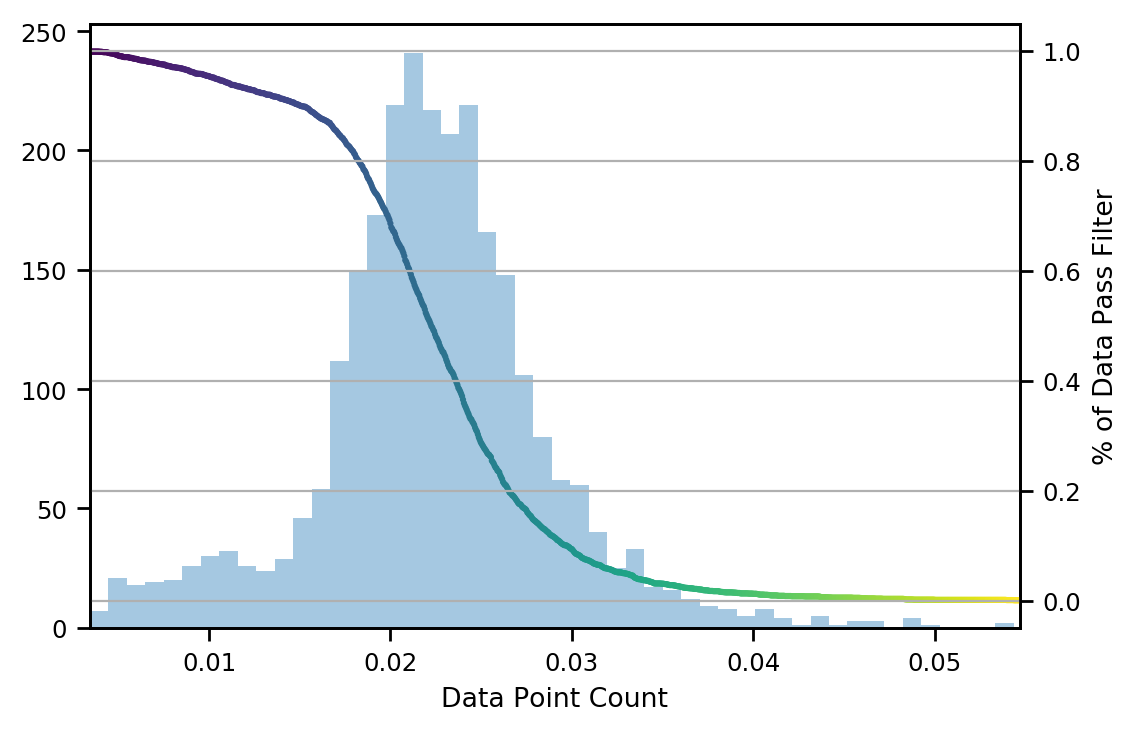

In [7]:
fig, axes = cutoff_vs_cell_remain(data=total_meta['CH_Rate'], 
                                  cutoff_num=1000, bins=50, kde=False)

### mCG%

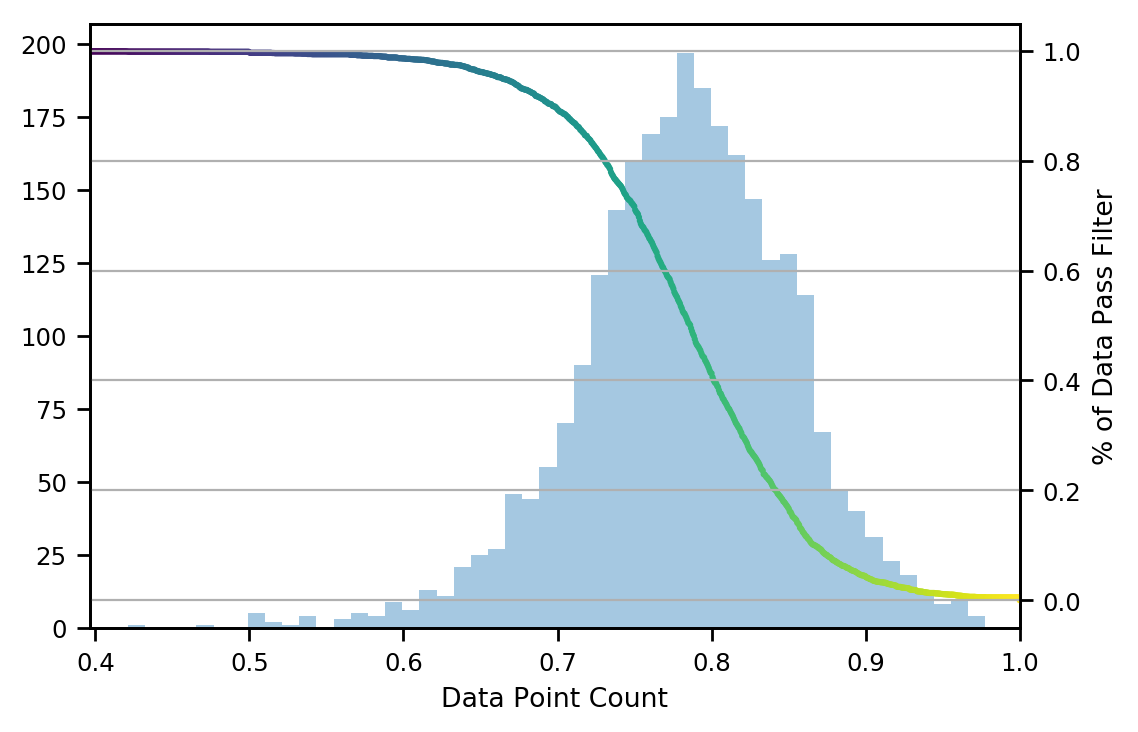

In [8]:
fig, axes = cutoff_vs_cell_remain(data=total_meta['CG_Rate'], 
                                  cutoff_num=1000, bins=50, kde=False)

### Dedupped Reads

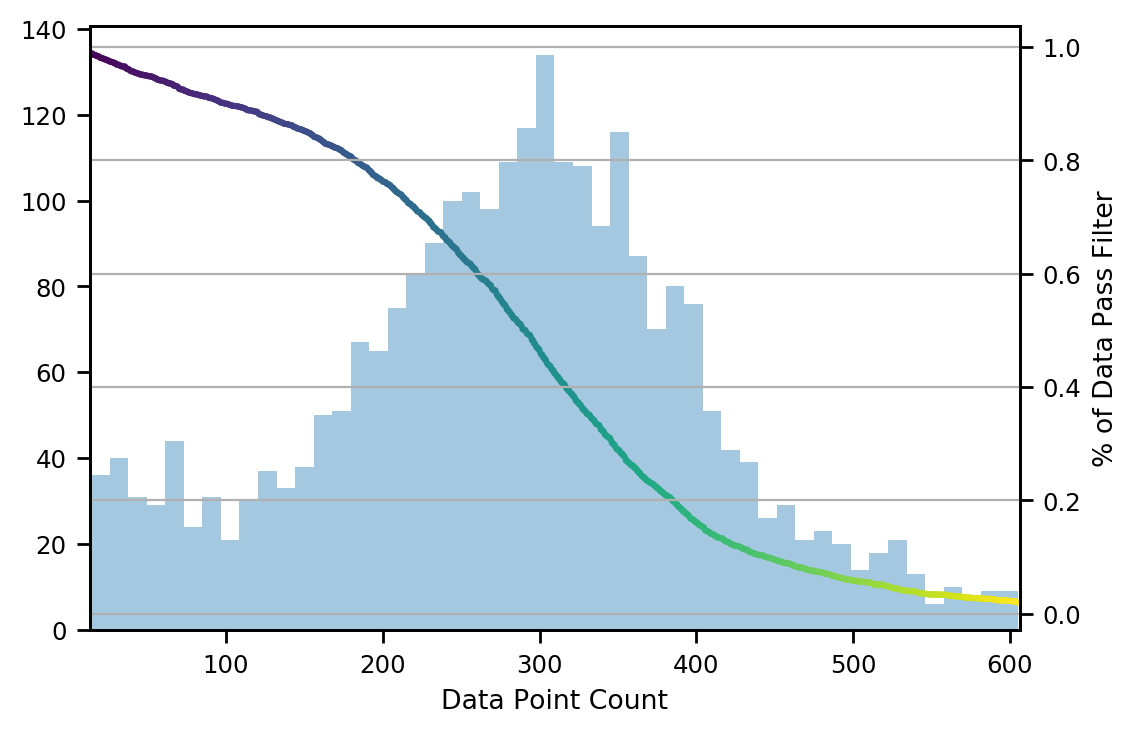

In [9]:
fig, axes = cutoff_vs_cell_remain(data=total_meta['DeduppedReads'], 
                                  cutoff_num=1000, bins=50, kde=False, xlim_quantile=(0.01, 0.98))

In [10]:
cell_pass = (total_meta['DeduppedReads'] > 100).sum()
total_input = total_meta['MultiplexReadsTotal'].reset_index()[['uid', 'MultiplexReadsTotal']].drop_duplicates()['MultiplexReadsTotal'].sum()
total_final = total_meta['DeduppedReads'].sum()
print(f'In {cemba_region_name}, {cell_pass} cells have > 100 final reads.')
print(f'In {cemba_region_name}, {total_input} total input reads.')
print(f'In {cemba_region_name}, {int(total_final)} total final reads.')

In 12B, 2447 cells have > 100 final reads.
In 12B, 1316320 total input reads.
In 12B, 784067 total final reads.


## Success vs Fail

/gale/netapp/home/hanliu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


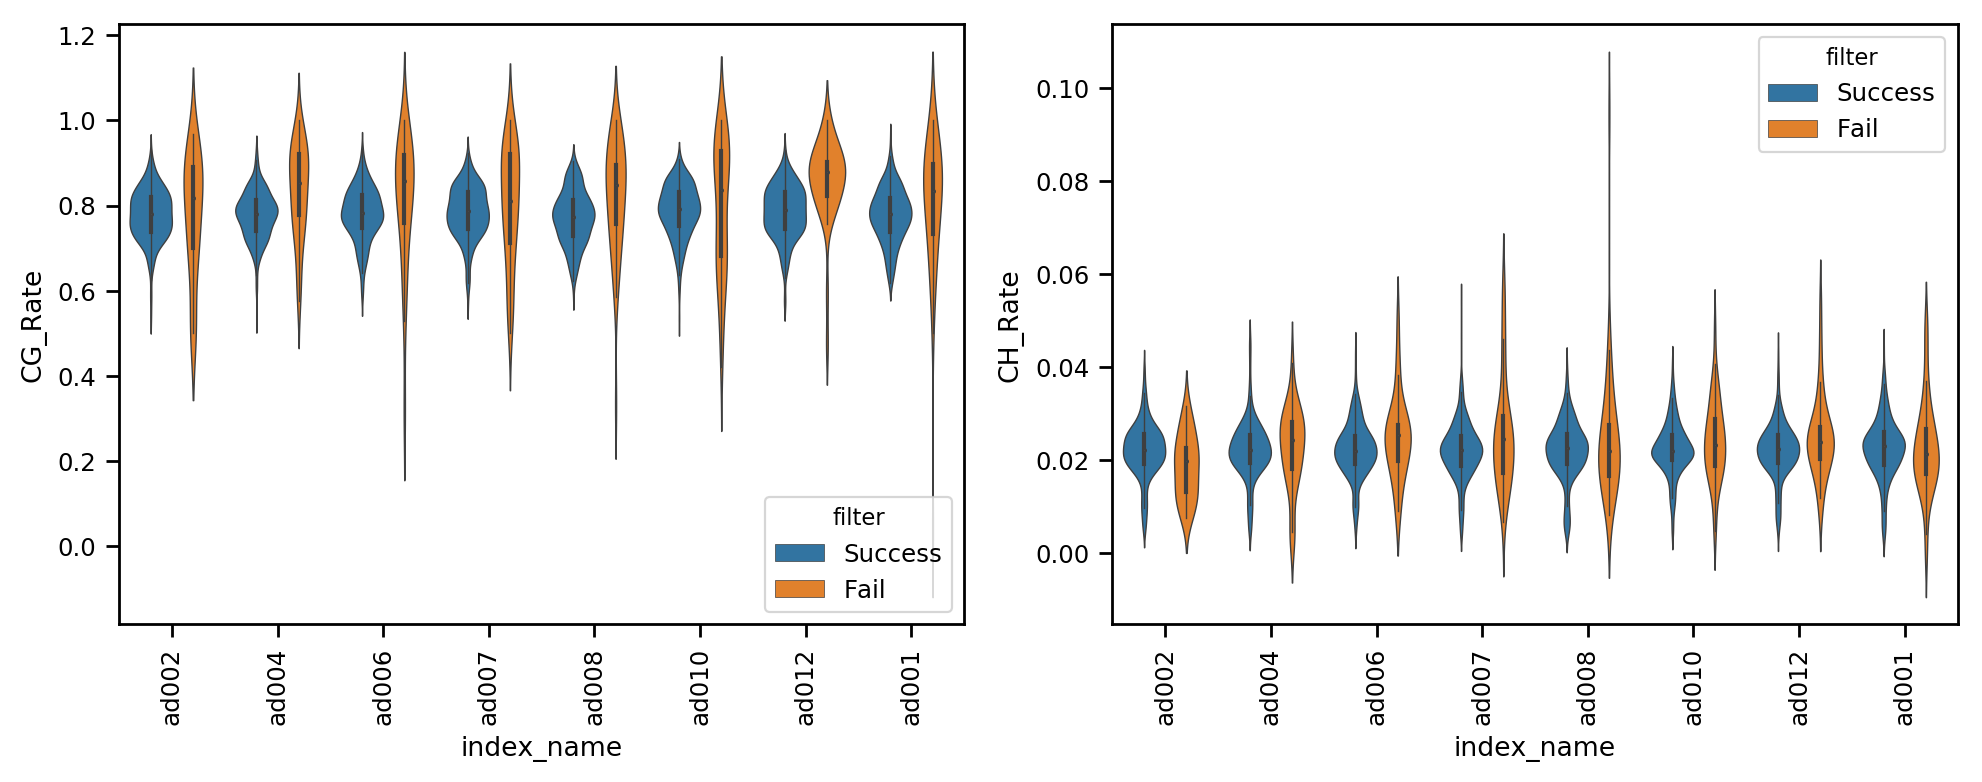

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
ax = success_vs_fail(total_meta.reset_index(), 'DeduppedReads', 100, 'index_name', 'CG_Rate', ax=axes[0])
ax = success_vs_fail(total_meta.reset_index(), 'DeduppedReads', 100, 'index_name', 'CH_Rate', ax=axes[1])
fig.tight_layout()

## mC%

### mCG%

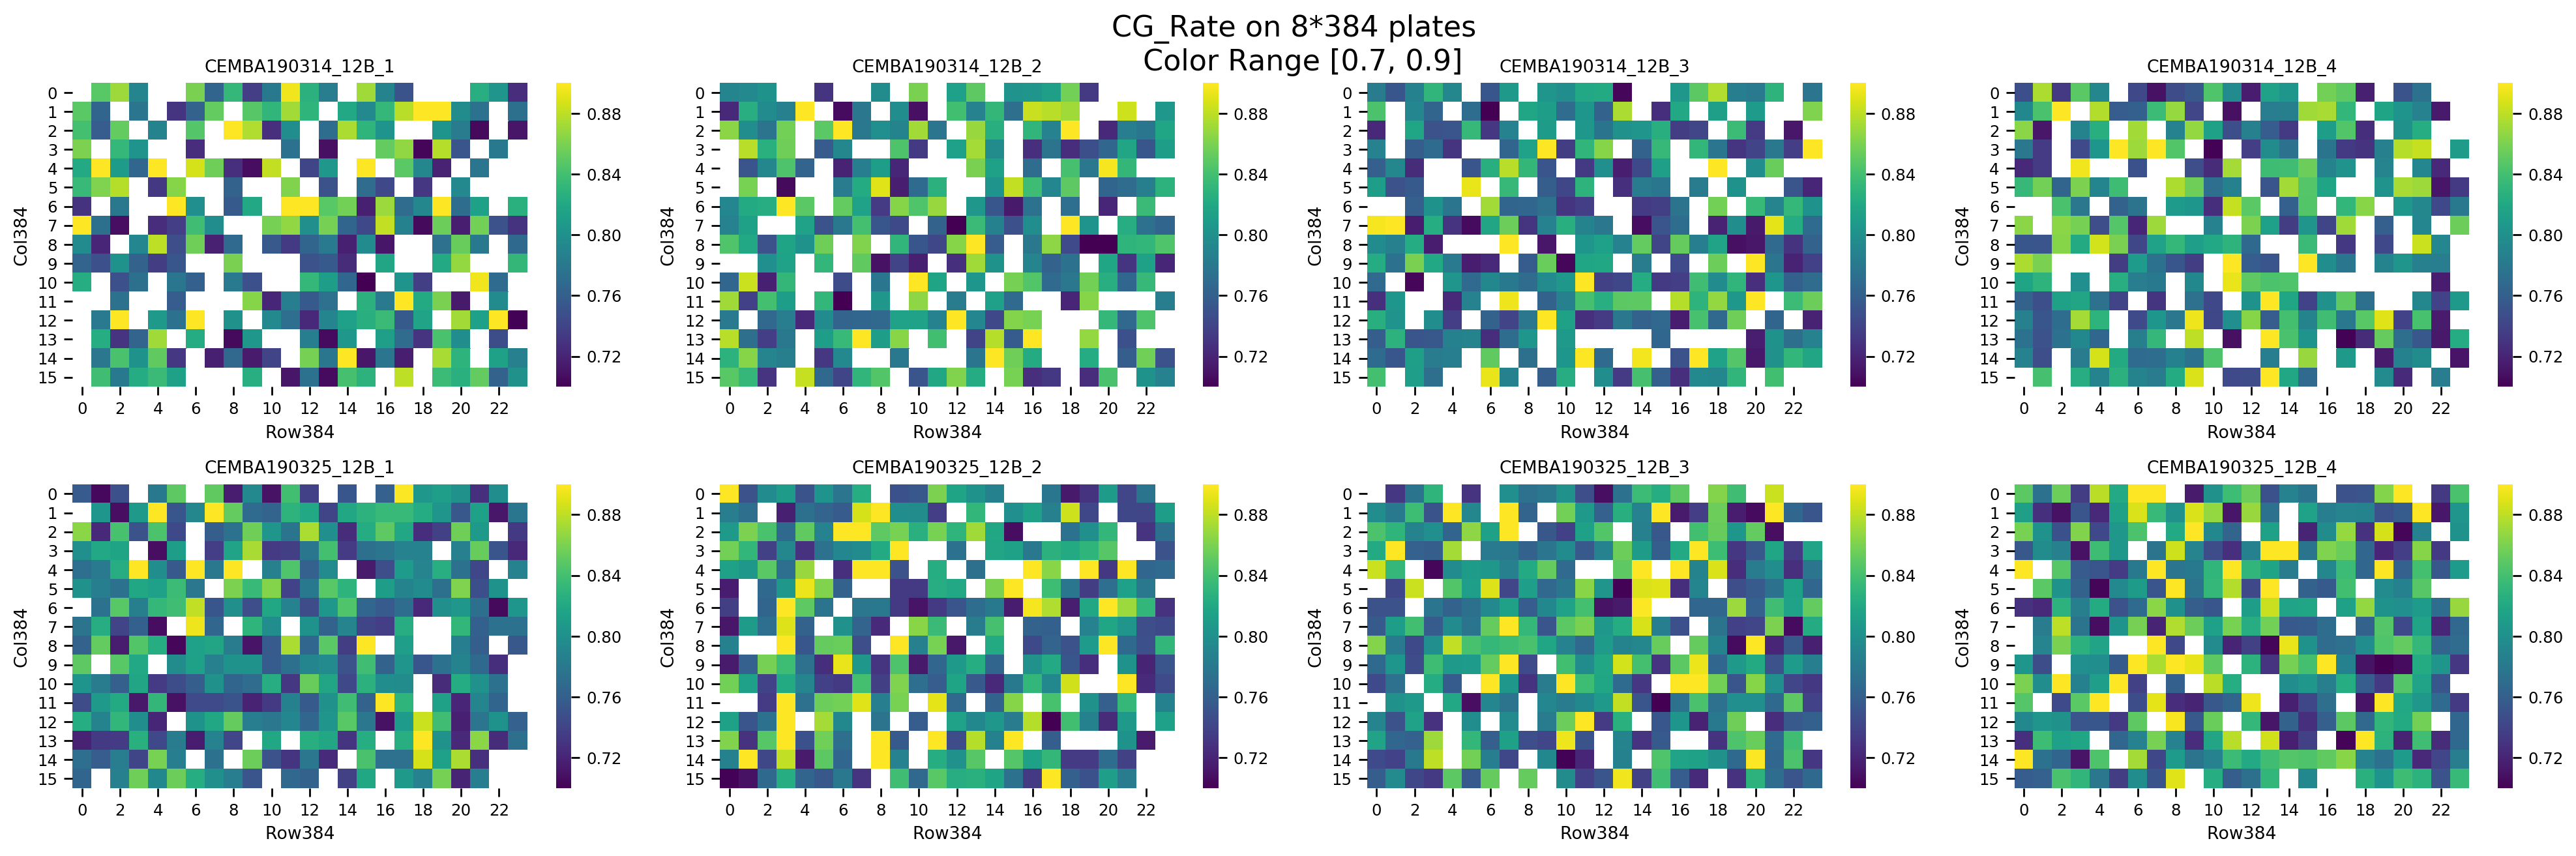

In [12]:
fig, axes = plot_on_plate(total_meta, 'CG_Rate', 'real_plate', vmin=0.7, vmax=0.9, 
                          heatmap_kws={'linewidth': 0, 'linecolor': '#EEEEEE'}, 
                          aggregation_func=lambda i: i.mean())

### mCH %

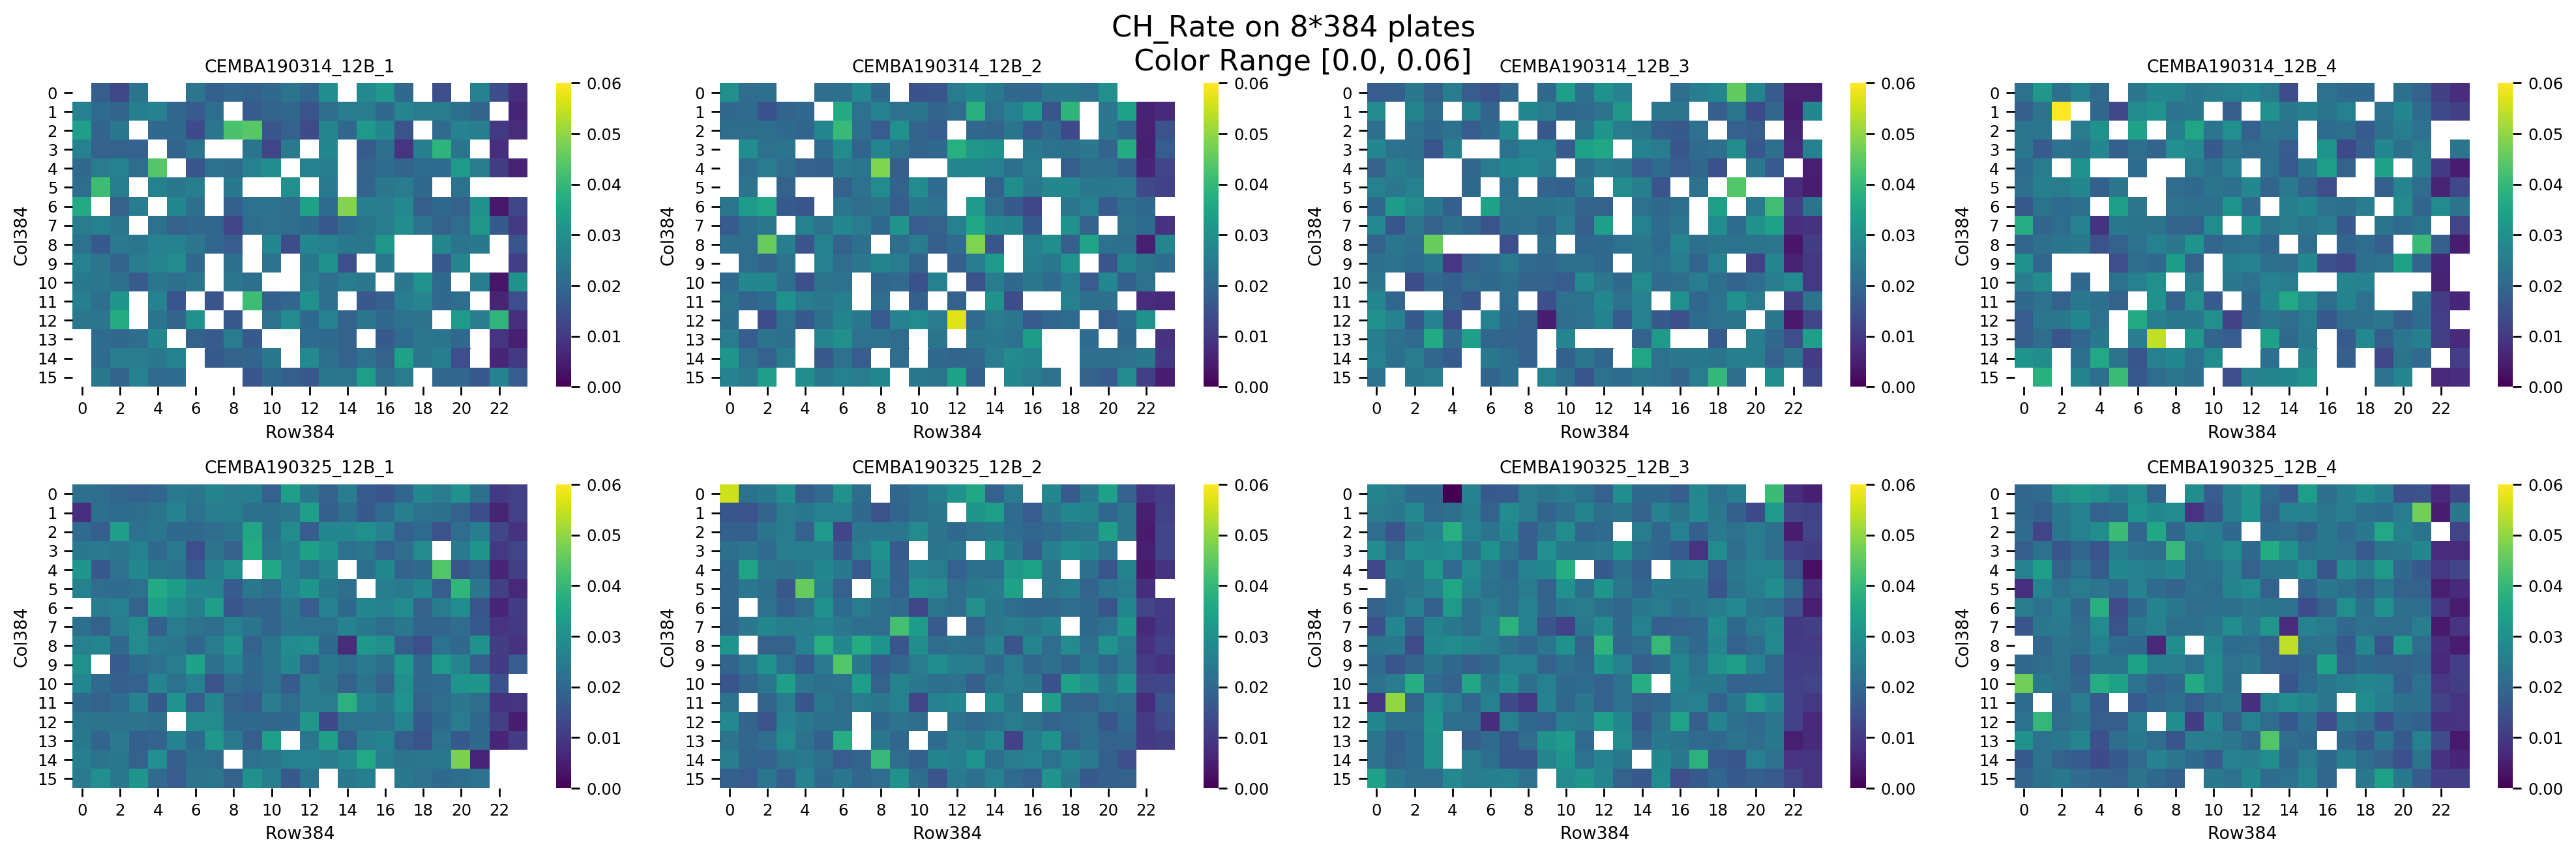

In [13]:
fig, axes = plot_on_plate(total_meta, 'CH_Rate', 'real_plate', vmin=0., vmax=0.06, 
                          heatmap_kws={'linewidth': 0, 'linecolor': '#EEEEEE'}, 
                          aggregation_func=lambda i: i.mean())

## Reads at FASTQ level
### MultiplexReadsTotal
- Total Fastq Reads before demultiplex

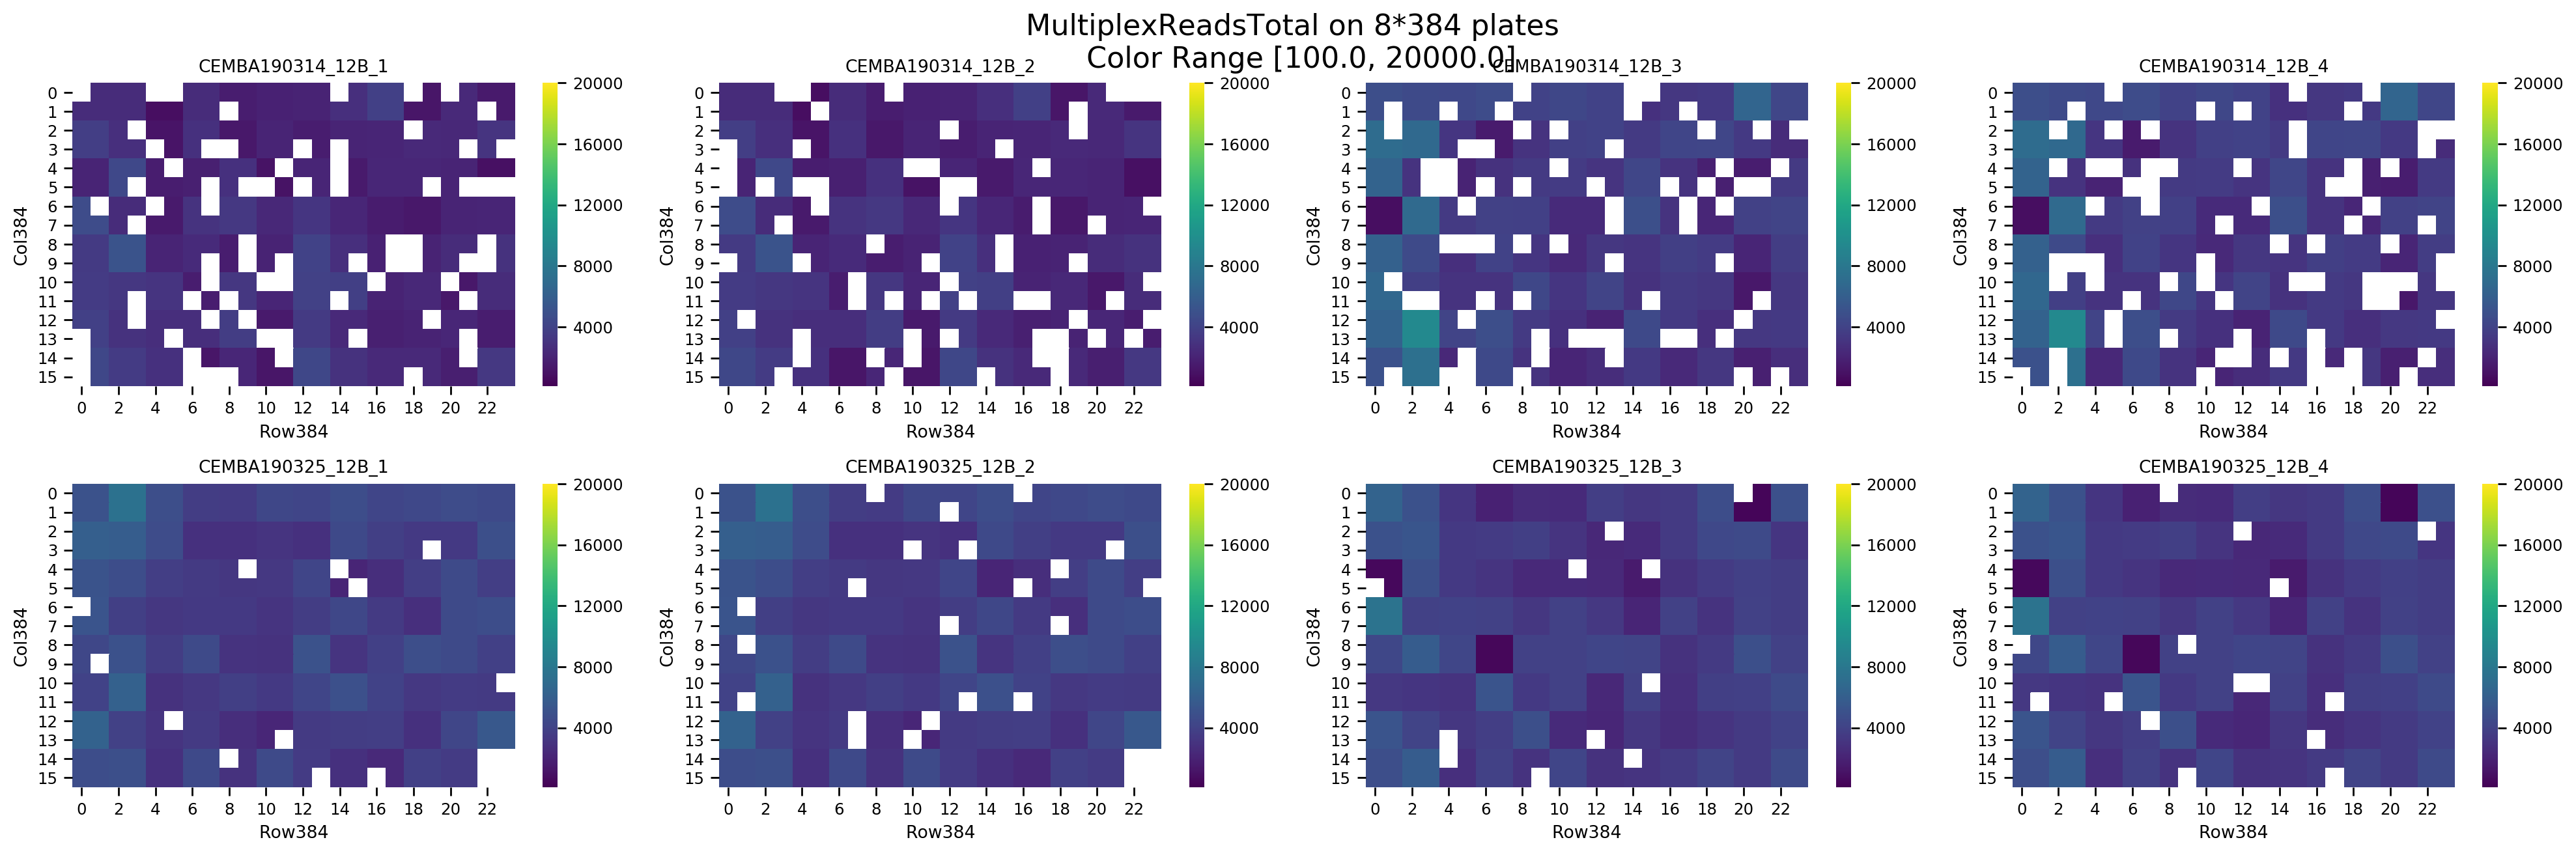

In [14]:
fig, axes = plot_on_plate(total_meta, 'MultiplexReadsTotal', 'real_plate', vmin=1e2, vmax=2e4, 
                          heatmap_kws={'linewidth': 0, 'linecolor': '#EEEEEE'},
                          aggregation_func=lambda i: i.mean())

### IndexReadsRatio
- Portion of each index_name (cell) among every 8-multiplexed fastq group

/gale/netapp/home/hanliu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(<Figure size 1000x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2ba779a79e10>)

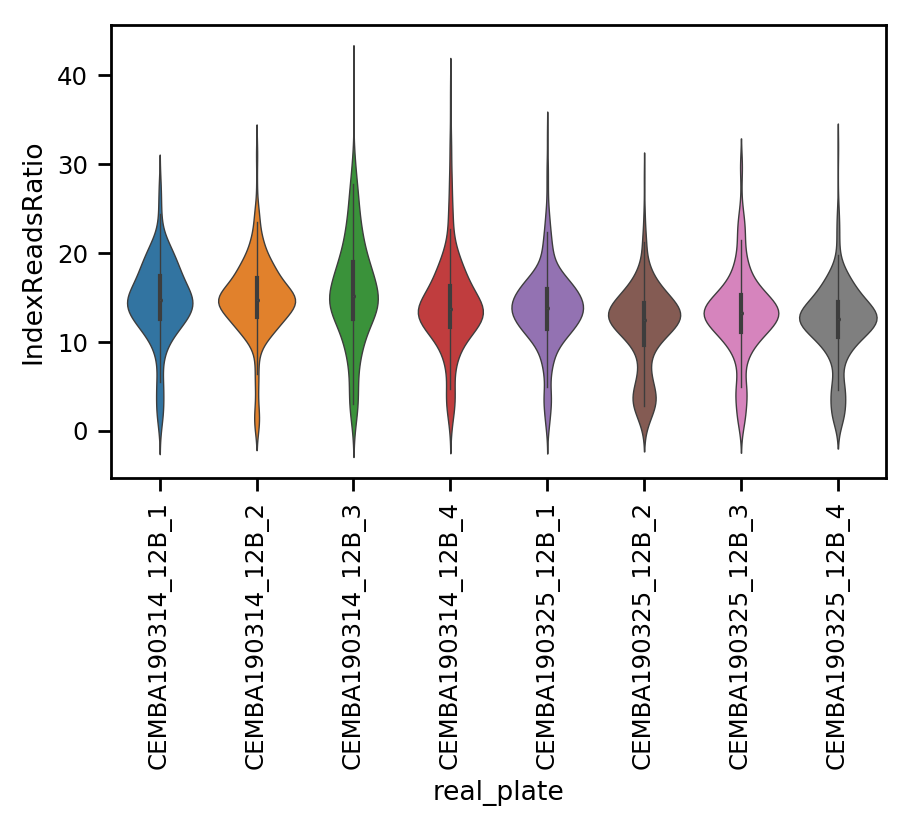

In [15]:
simple_violin(x='real_plate', y='IndexReadsRatio', data=total_meta)

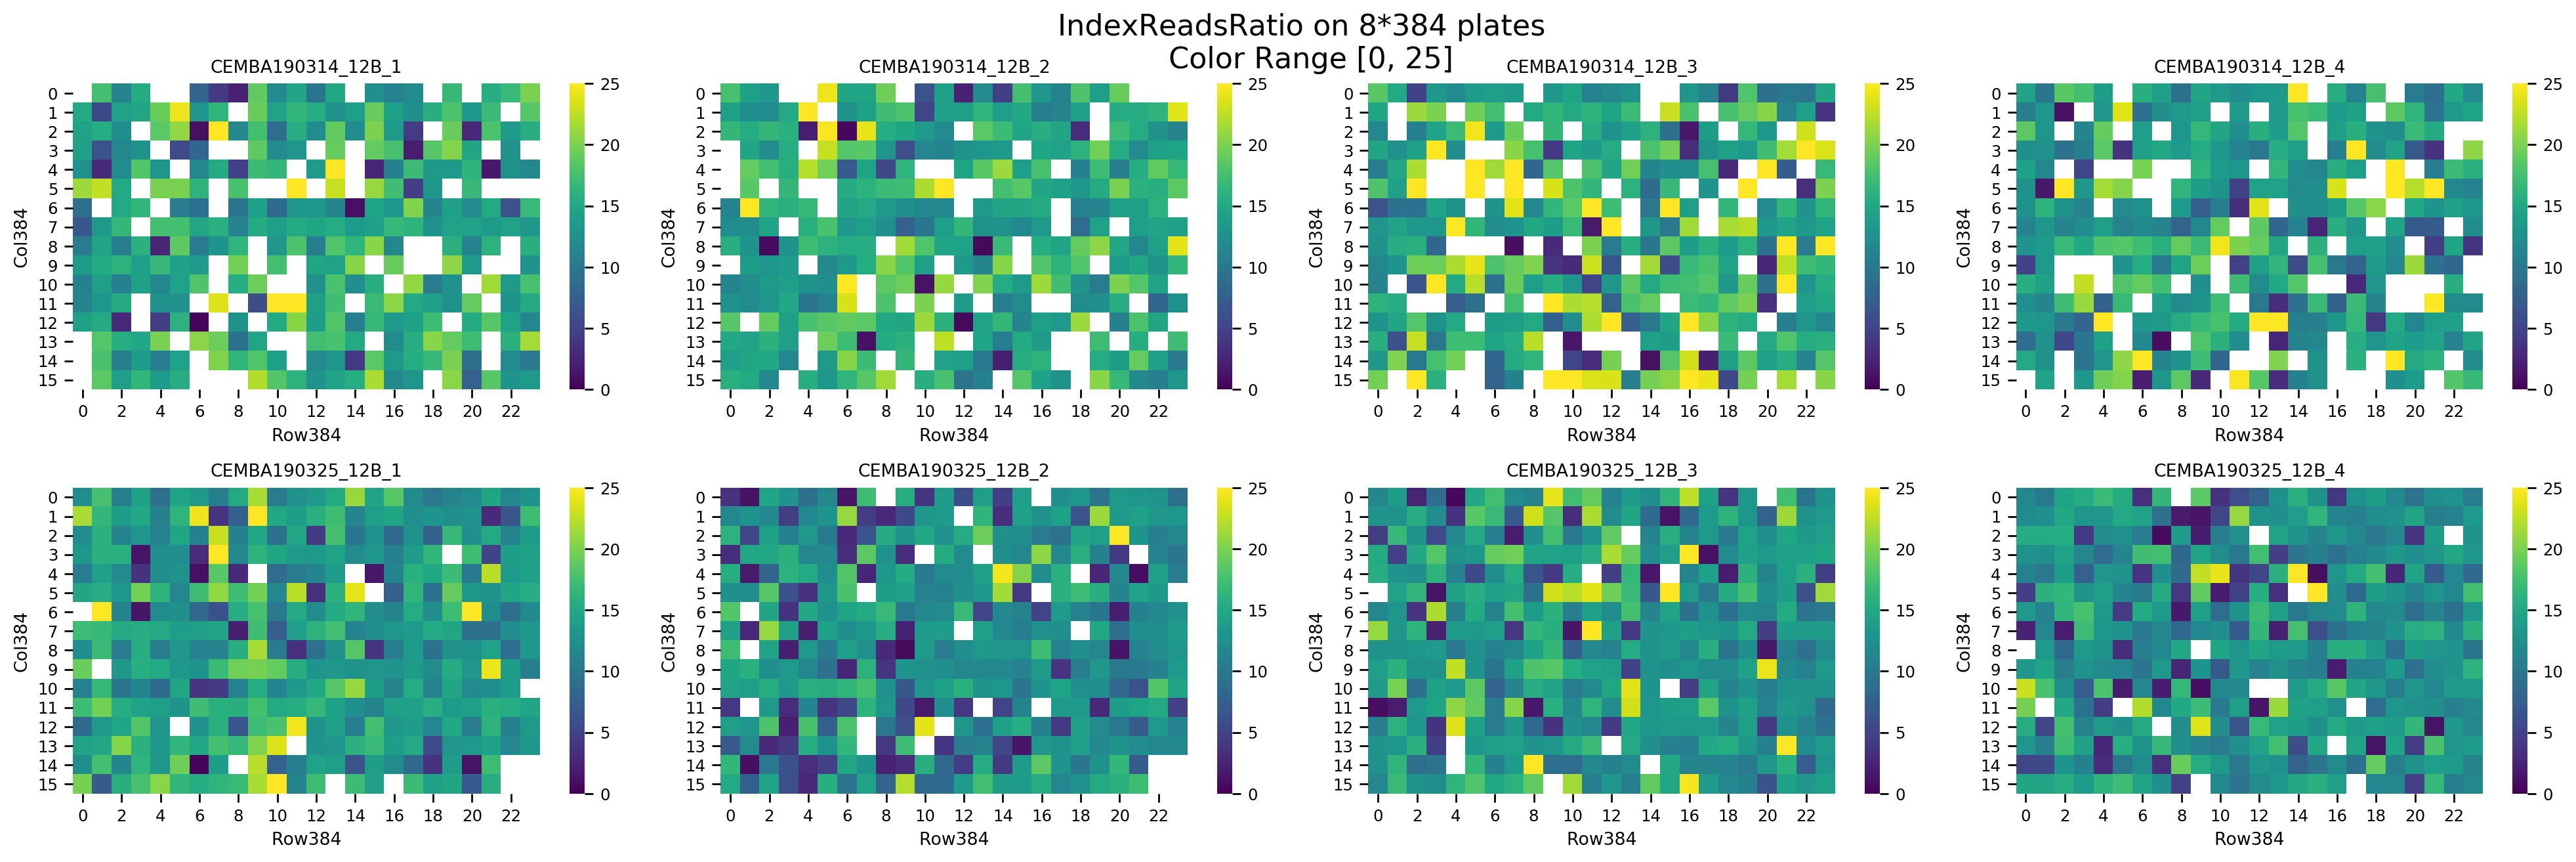

In [16]:
fig, axes = plot_on_plate(total_meta, 'IndexReadsRatio', 'real_plate', vmin=0, vmax=25, 
                          heatmap_kws={'linewidth': 0, 'linecolor': '#EEEEEE'}, 
                          aggregation_func=lambda i: i.mean())

### IndexReads
#### Total

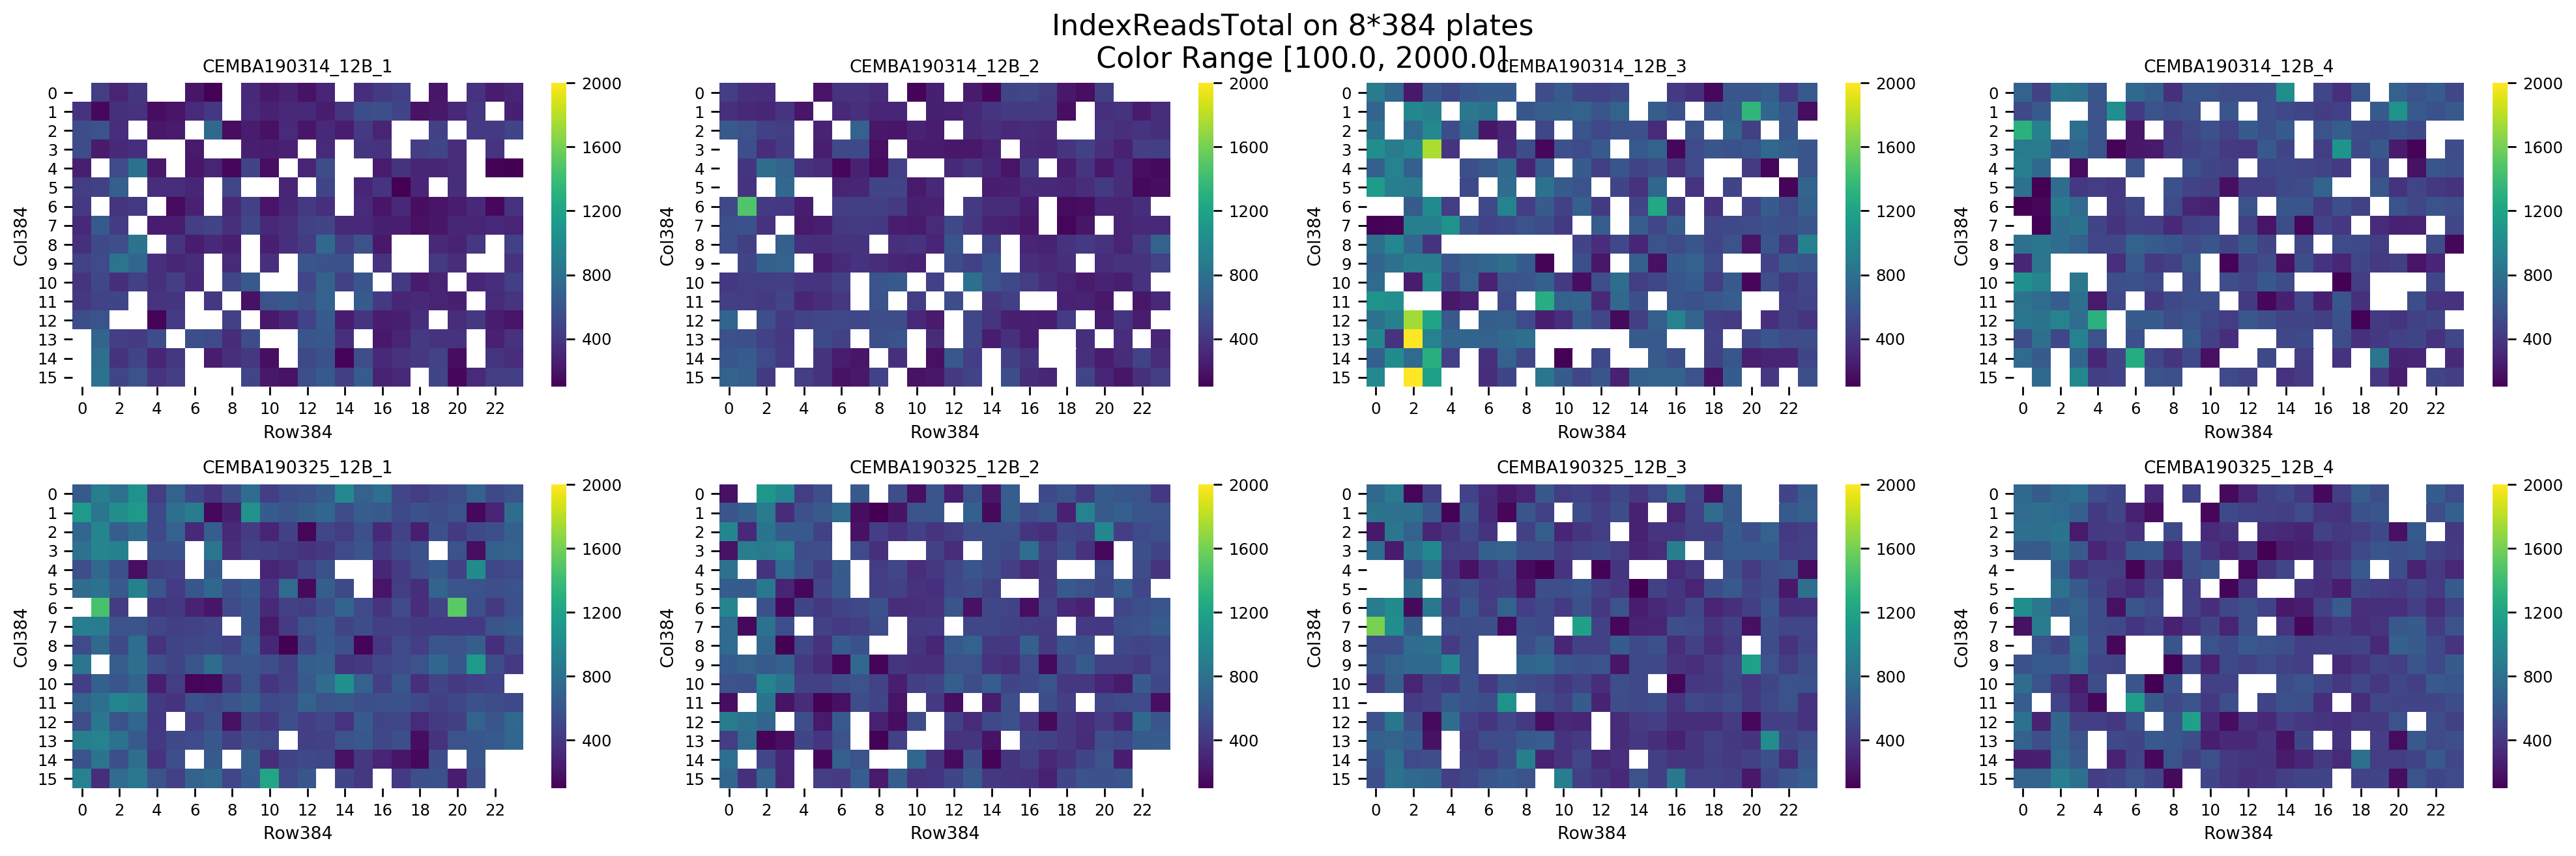

In [17]:
fig, axes = plot_on_plate(total_meta, 'IndexReadsTotal', 'real_plate', vmin=1e2, vmax=2e3, 
                          heatmap_kws={'linewidth': 0, 'linecolor': '#EEEEEE'}, 
                          aggregation_func=lambda i: i.mean())

#### Ratio

/gale/netapp/home/hanliu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0.7, 1)

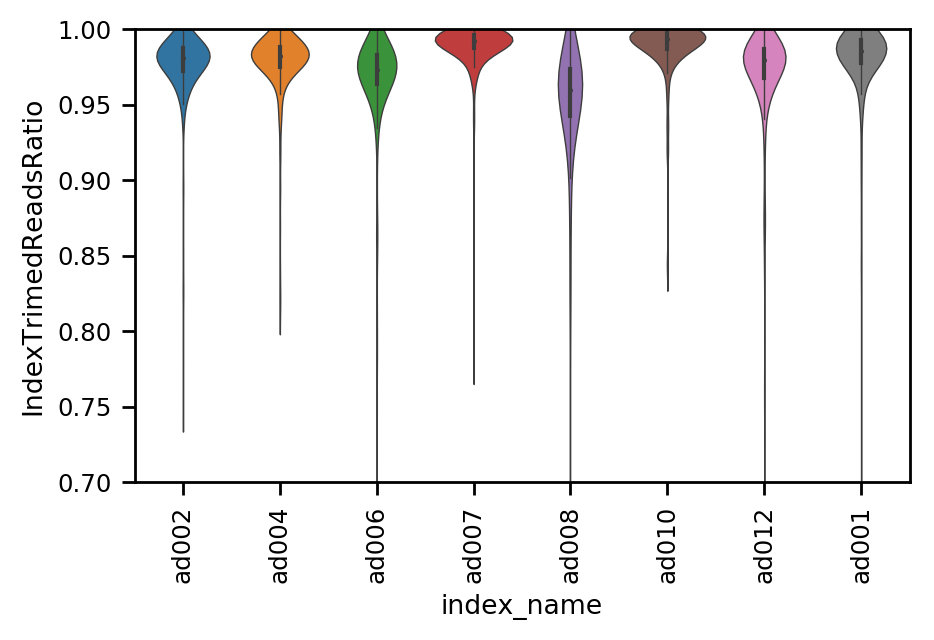

In [18]:
fig, ax = simple_violin(x='index_name', y='IndexTrimedReadsRatio', 
                        data=total_meta.reset_index())
ax.set_ylim(0.7, 1)

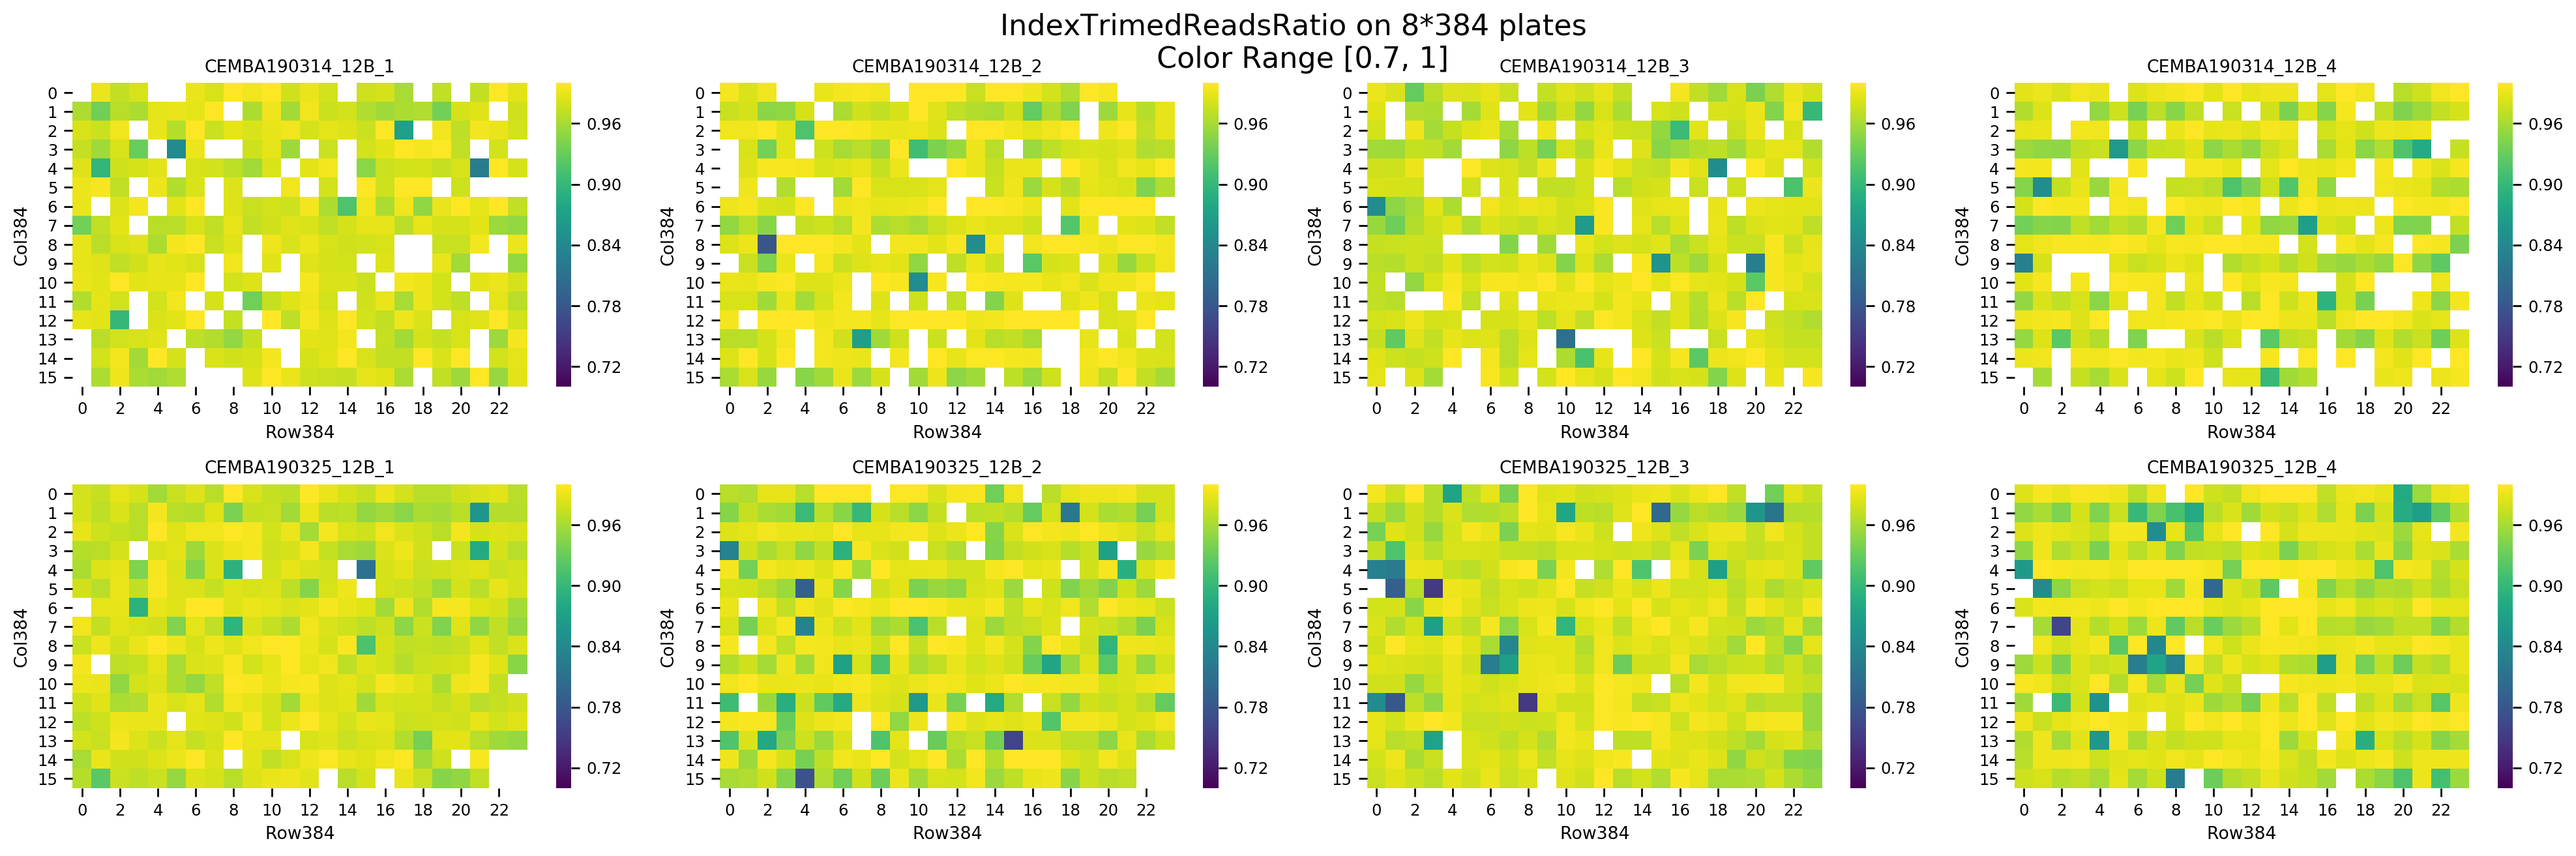

In [19]:
fig, axes = plot_on_plate(total_meta, 'IndexTrimedReadsRatio', 'real_plate', vmin=0.7, vmax=1, 
                          heatmap_kws={'linewidth': 0, 'linecolor': '#EEEEEE'}, 
                          aggregation_func=lambda i: i.mean())

##  Reads at BAM level

### Mapping Ratio

#### R1

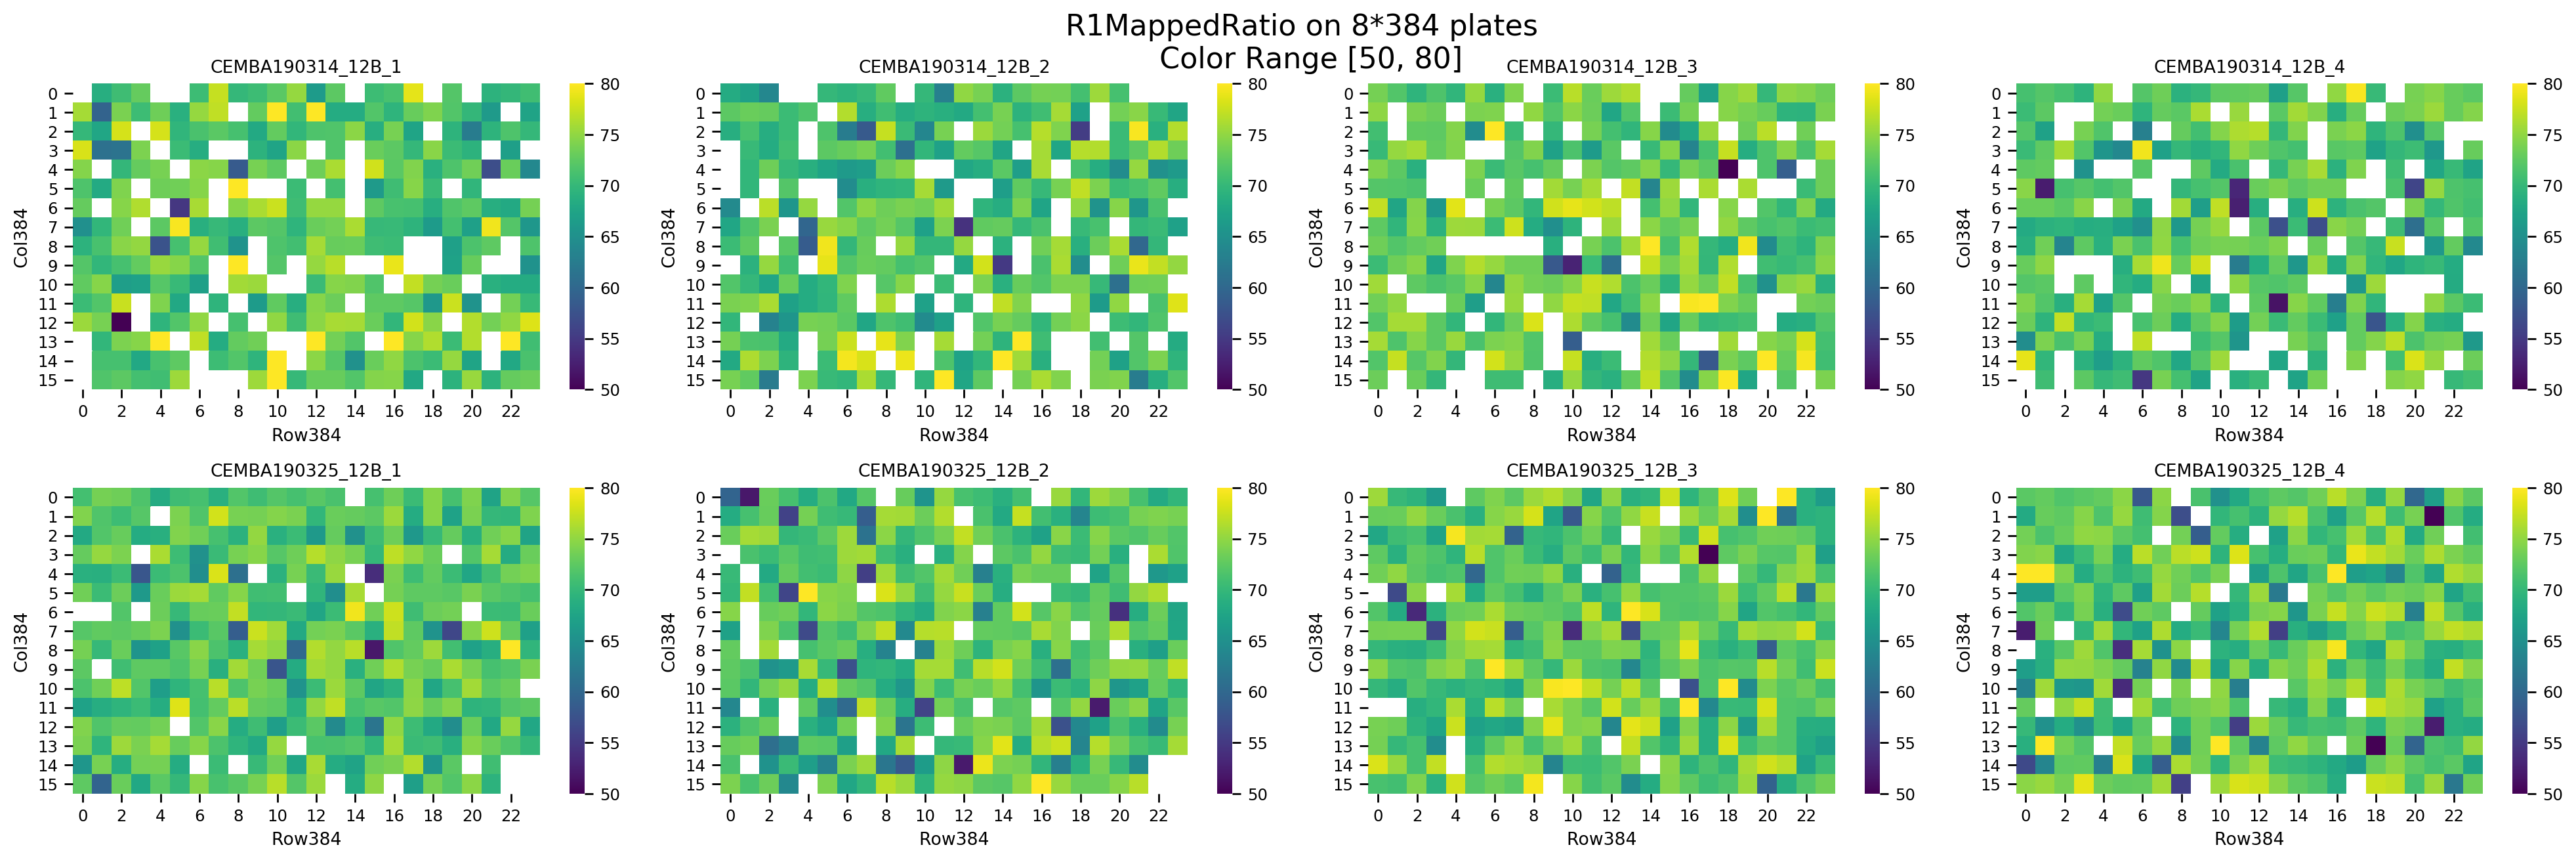

In [20]:
fig, axes = plot_on_plate(total_meta, 'R1MappedRatio', 'real_plate', vmin=50, vmax=80, 
                          heatmap_kws={'linewidth': 0, 'linecolor': '#EEEEEE'}, 
                          aggregation_func=lambda i: i.mean())

#### R2

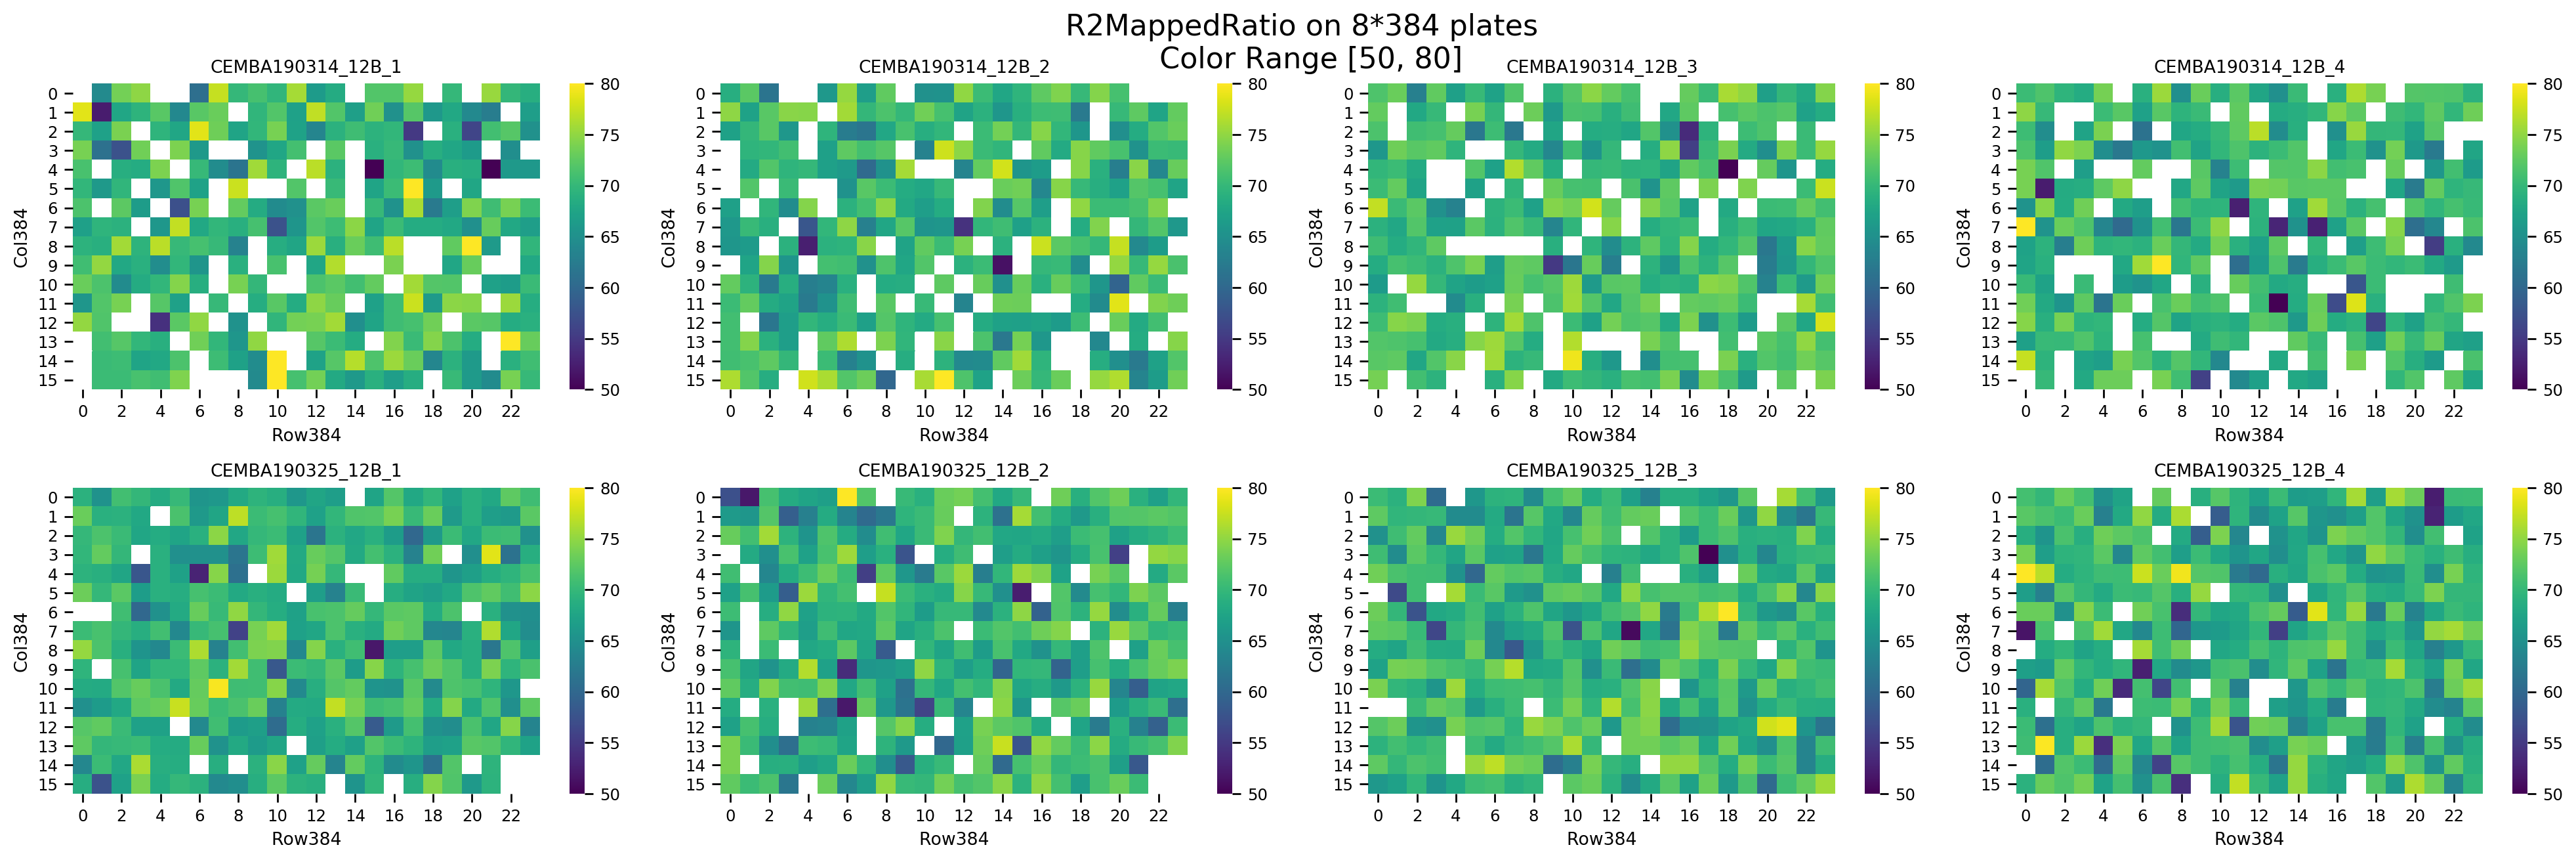

In [21]:
fig, axes = plot_on_plate(total_meta, 'R2MappedRatio', 'real_plate', vmin=50, vmax=80, 
                          heatmap_kws={'linewidth': 0, 'linecolor': '#EEEEEE'}, 
                          aggregation_func=lambda i: i.mean())

### PCR duplicates

####  Non-duplicates Ratio

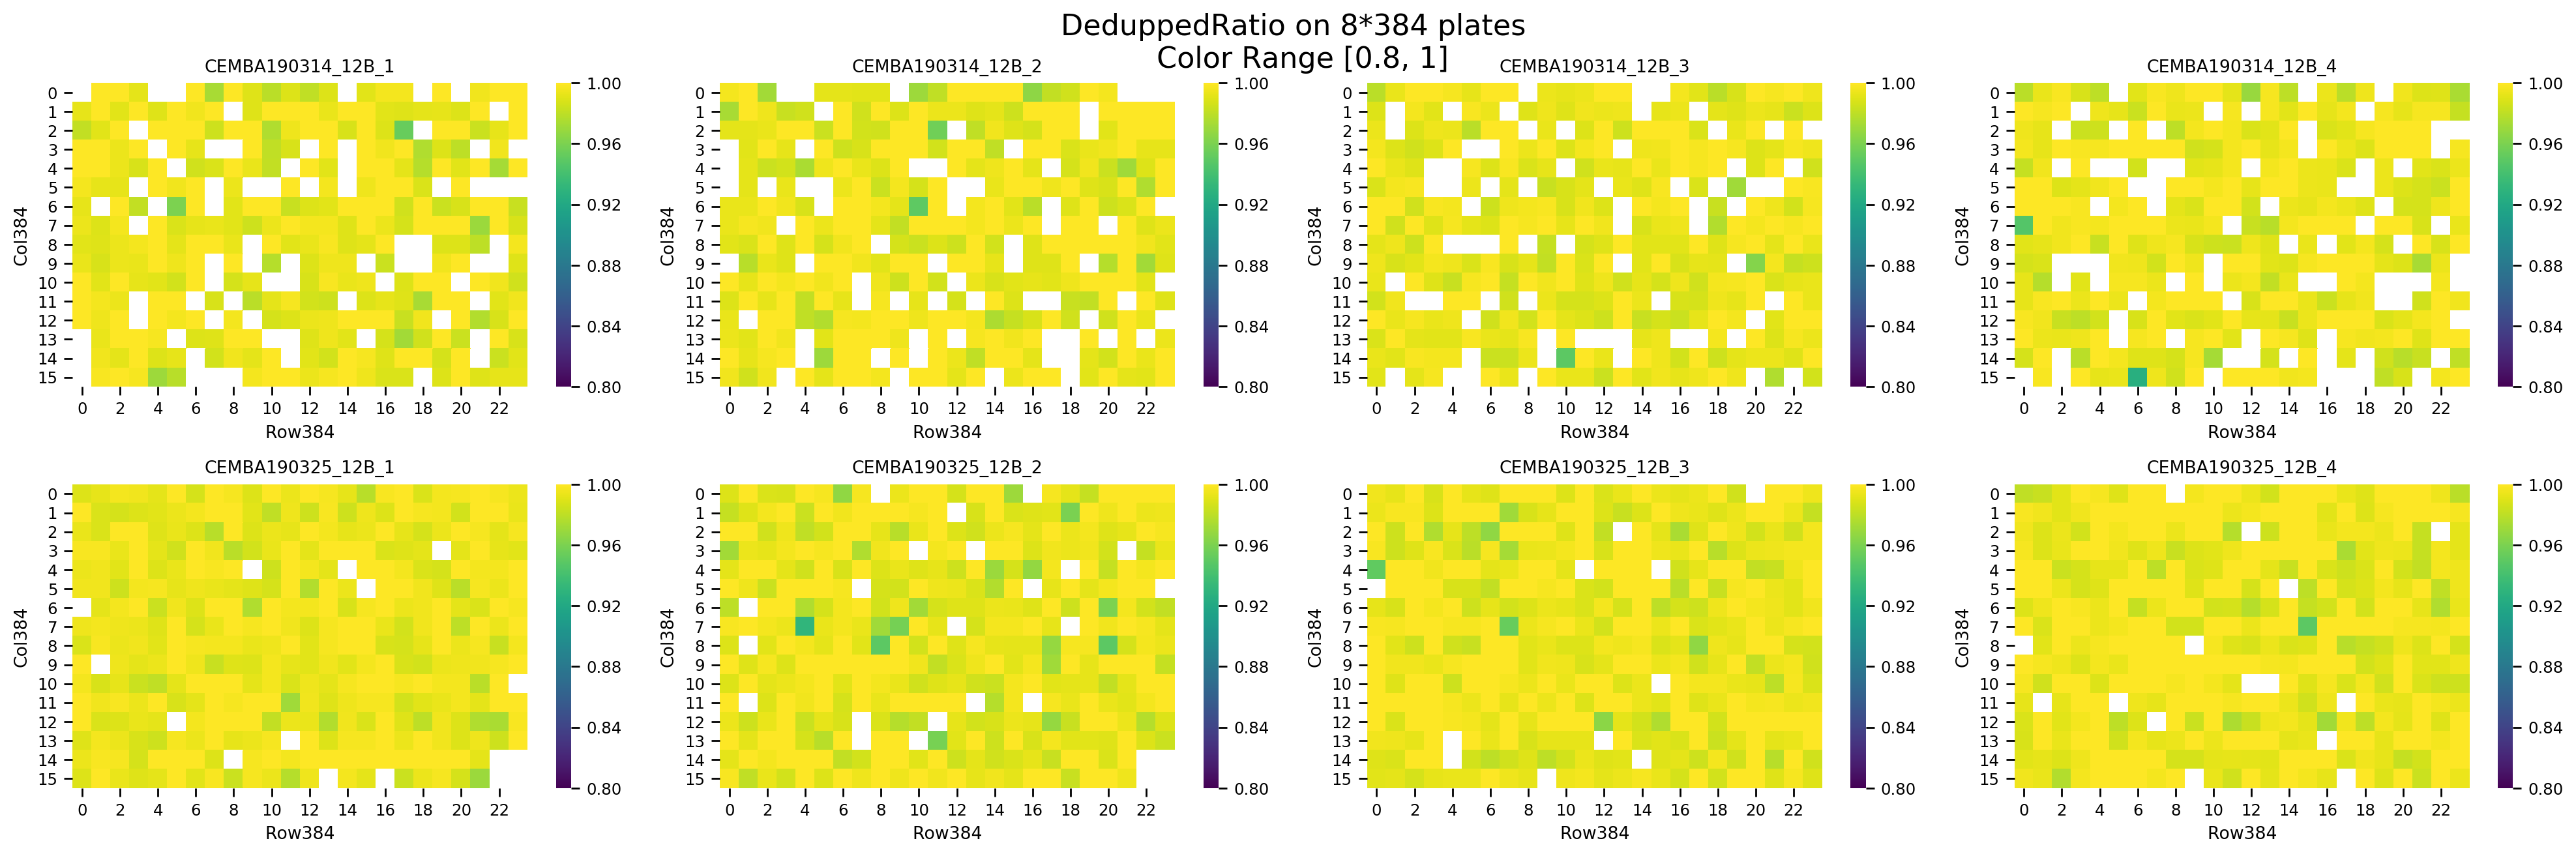

In [22]:
fig, axes = plot_on_plate(total_meta, 'DeduppedRatio', 'real_plate', vmin=0.8, vmax=1, 
                          heatmap_kws={'linewidth': 0, 'linecolor': '#EEEEEE'}, 
                          aggregation_func=lambda i: i.mean())

#### Total non-duplicate reads (including MAPQ filter)

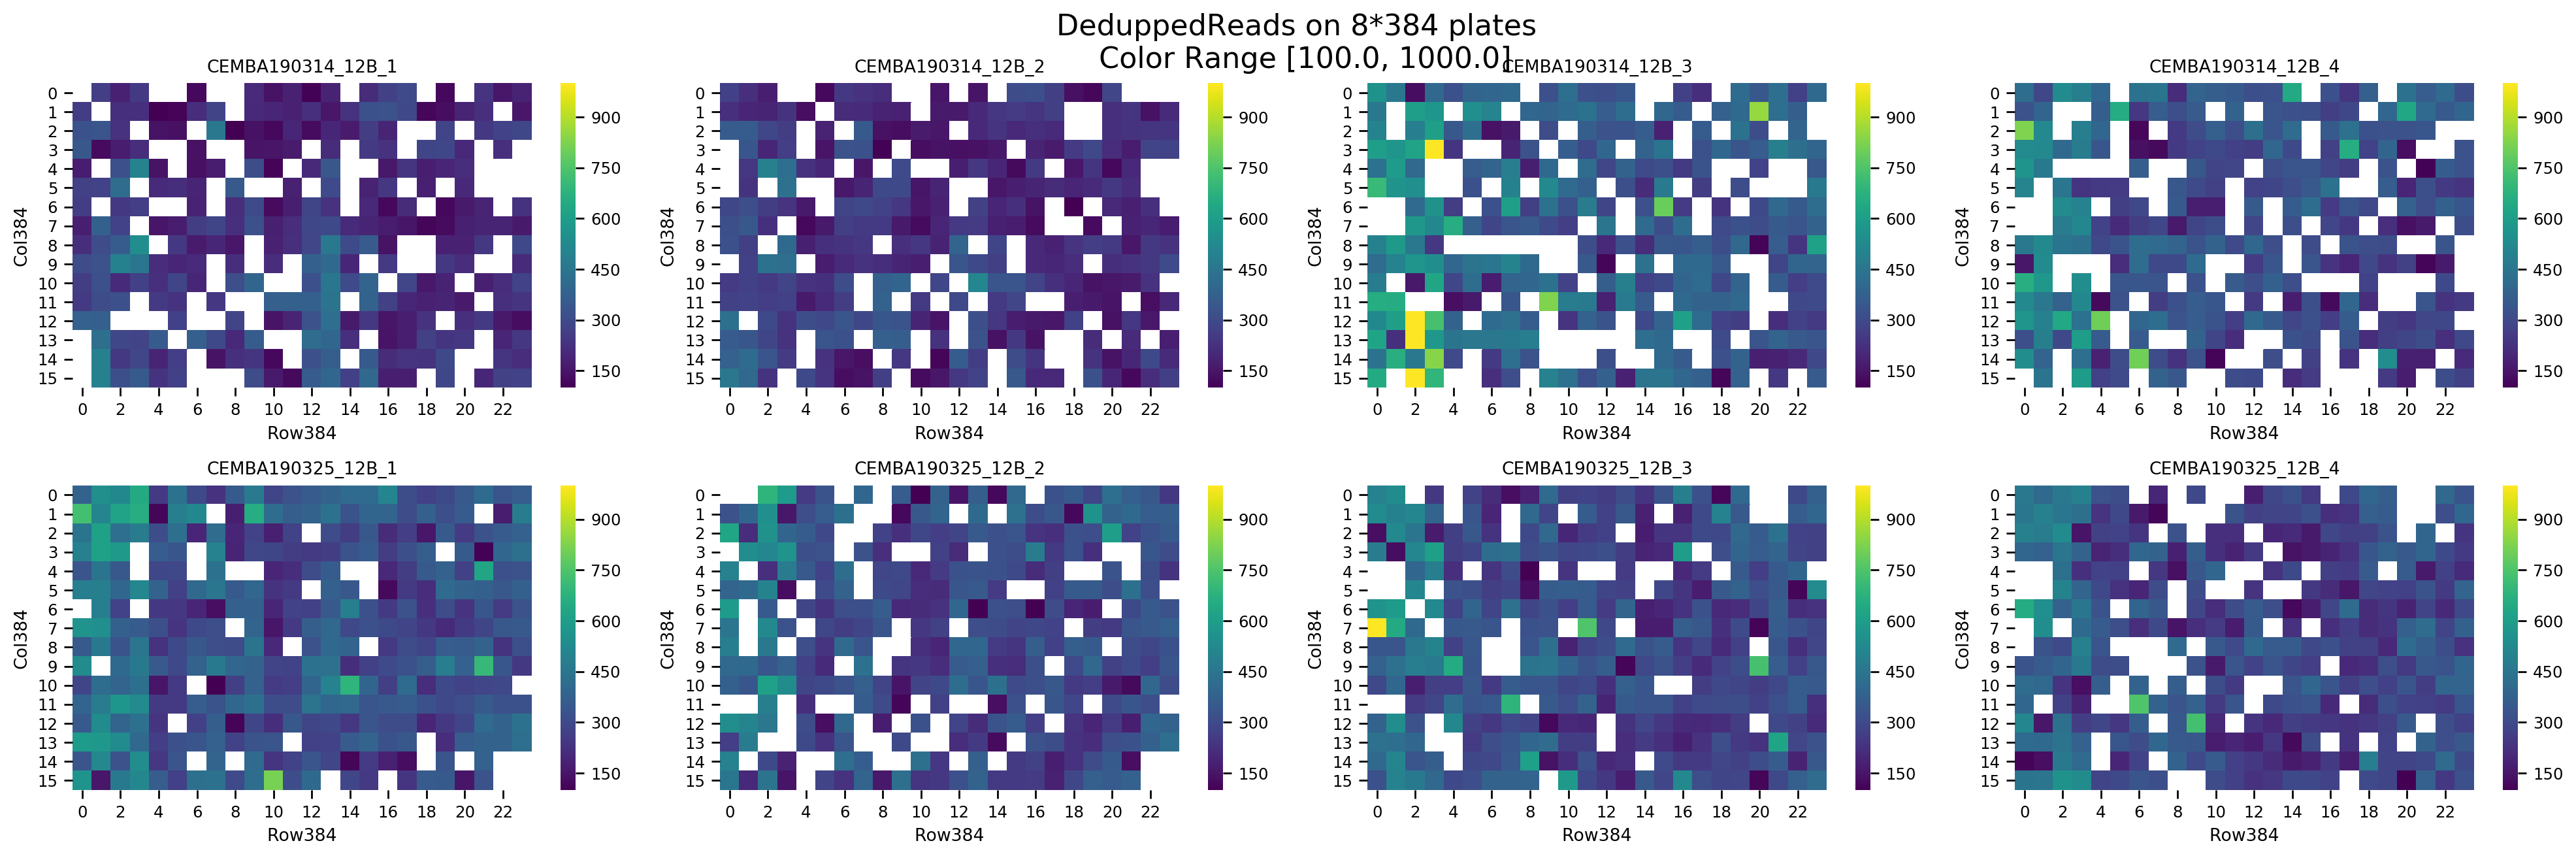

In [23]:
fig, axes = plot_on_plate(total_meta, 'DeduppedReads', 'real_plate', vmin=1e2, vmax=1e3, 
                          heatmap_kws={'linewidth': 0, 'linecolor': '#EEEEEE'}, 
                          aggregation_func=lambda i: i.mean())

## Pairplot

/gale/netapp/home/hanliu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


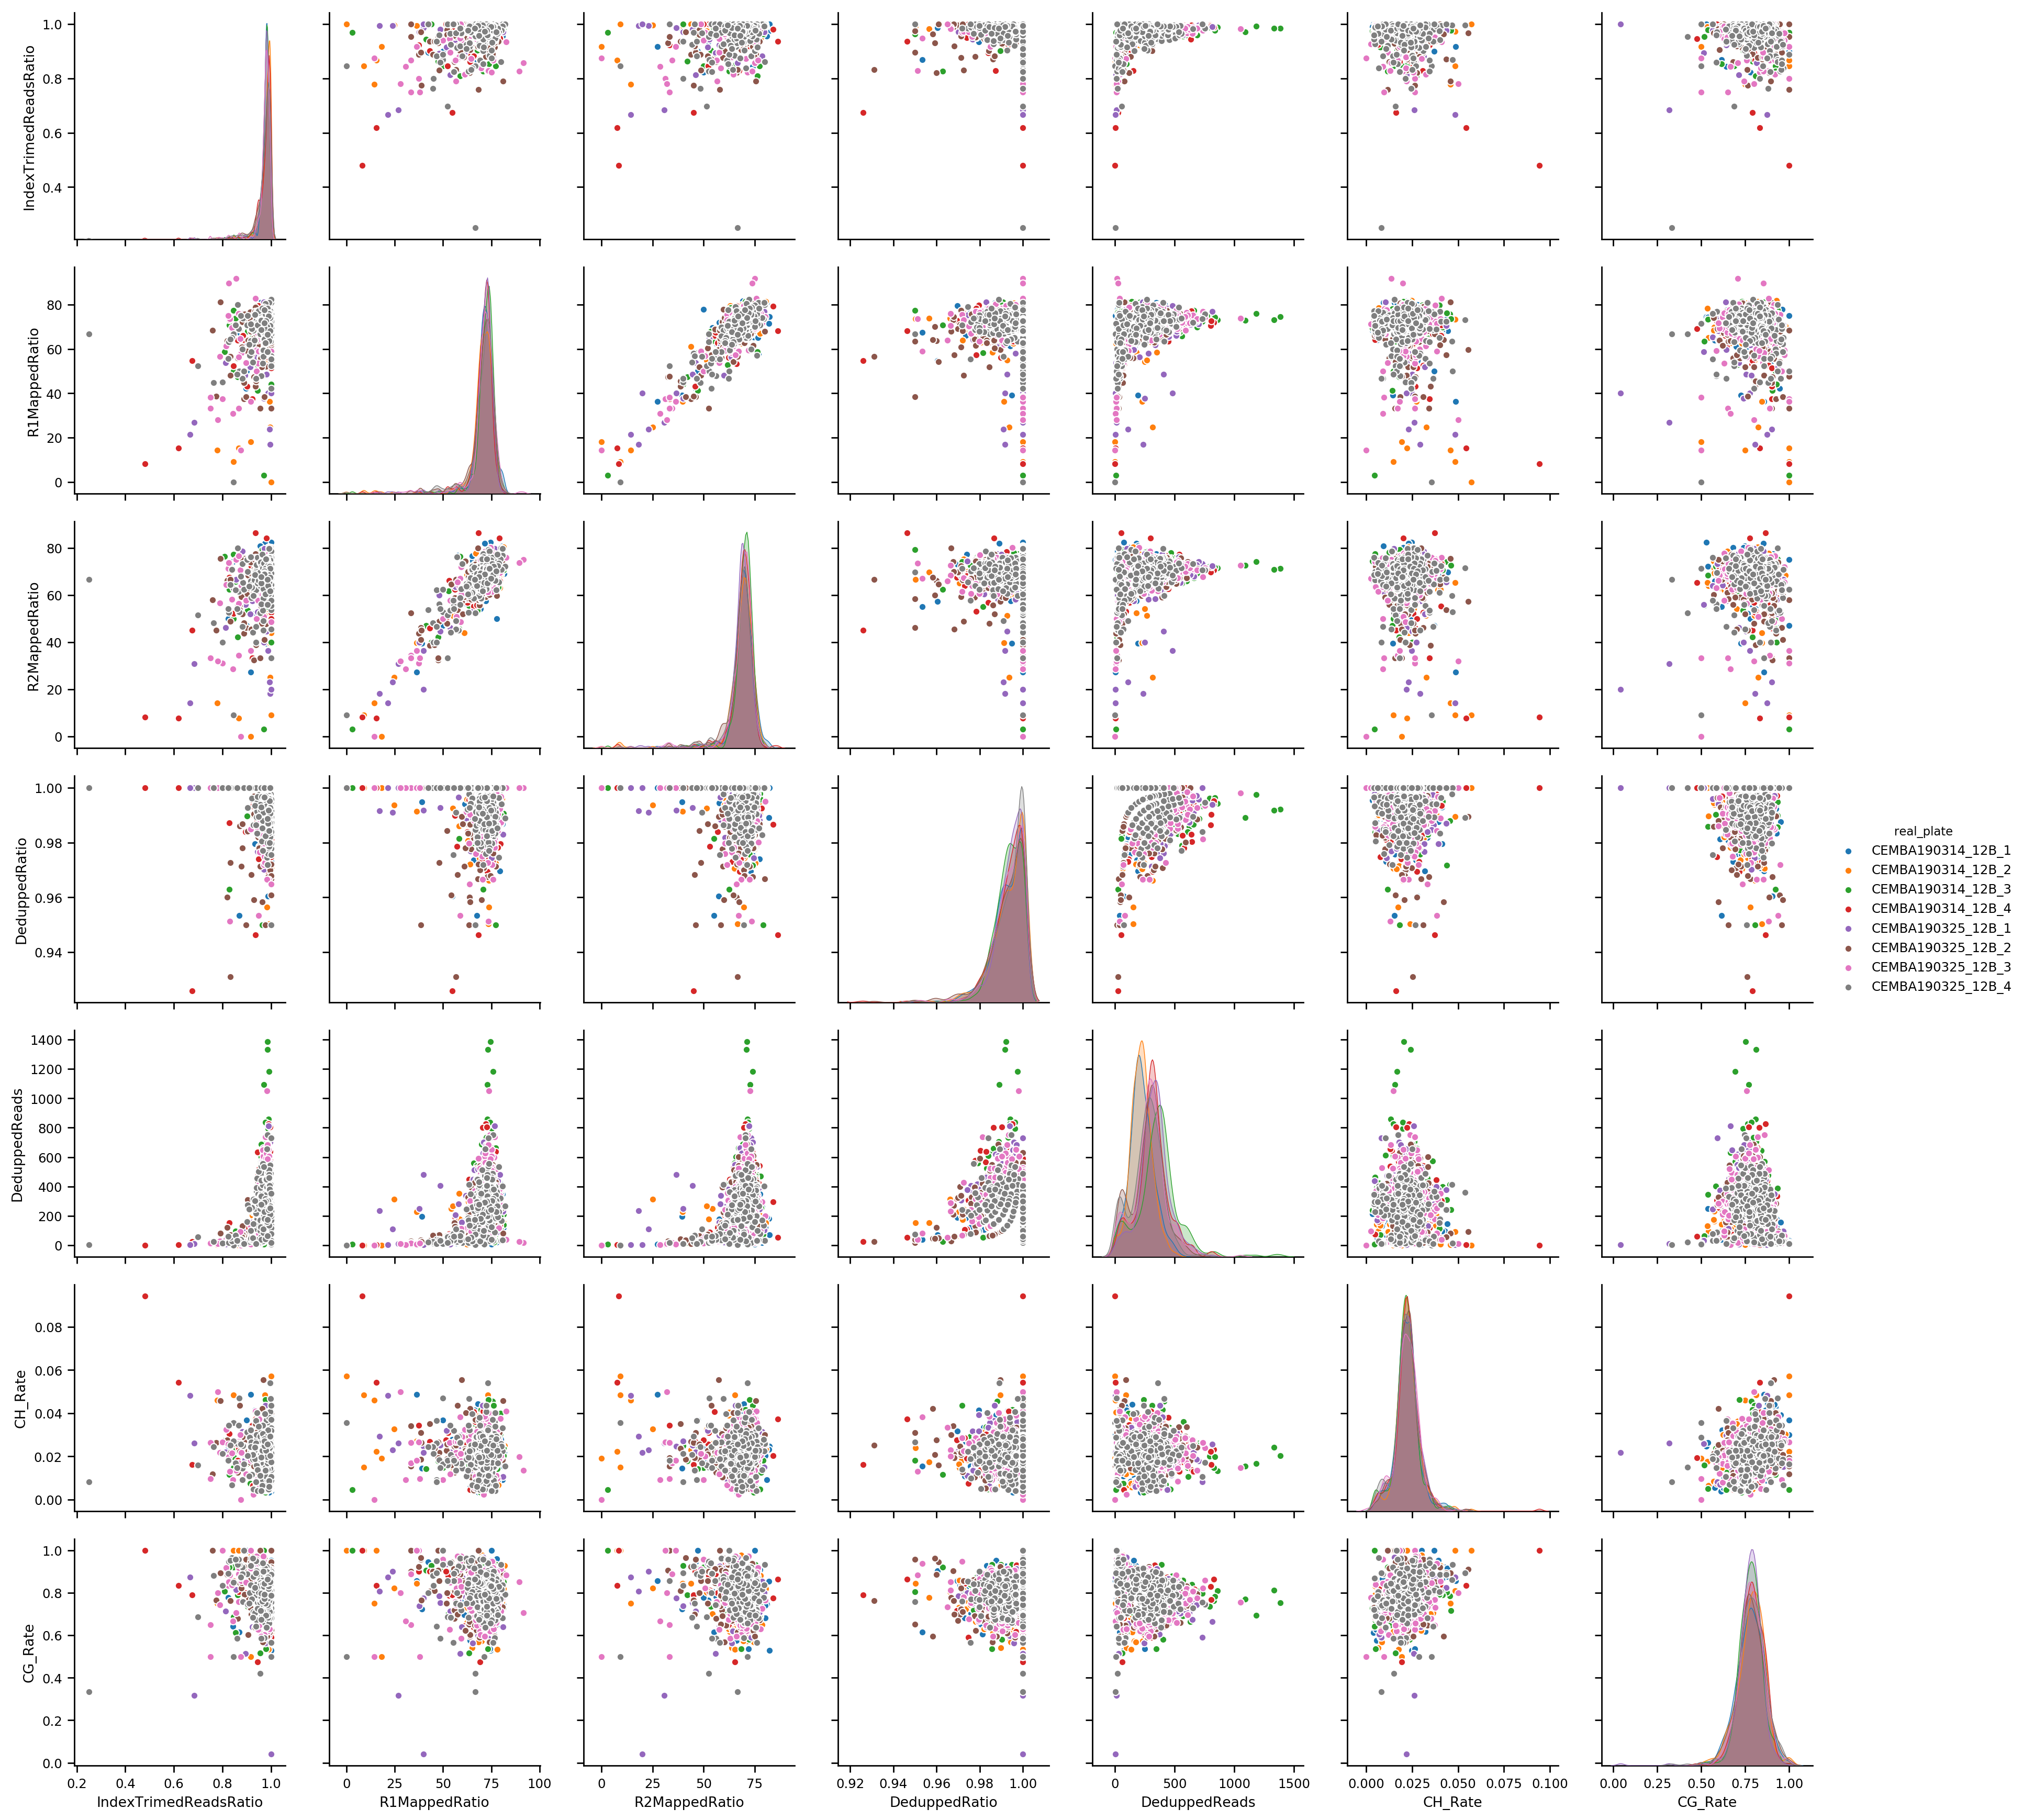

In [24]:
sns.pairplot(total_meta.reset_index()[['real_plate', 'IndexTrimedReadsRatio',
                                       'R1MappedRatio', 'R2MappedRatio',
                                       'DeduppedRatio', 'DeduppedReads', 'CH_Rate', 'CG_Rate']], 
             hue='real_plate')

/gale/netapp/home/hanliu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


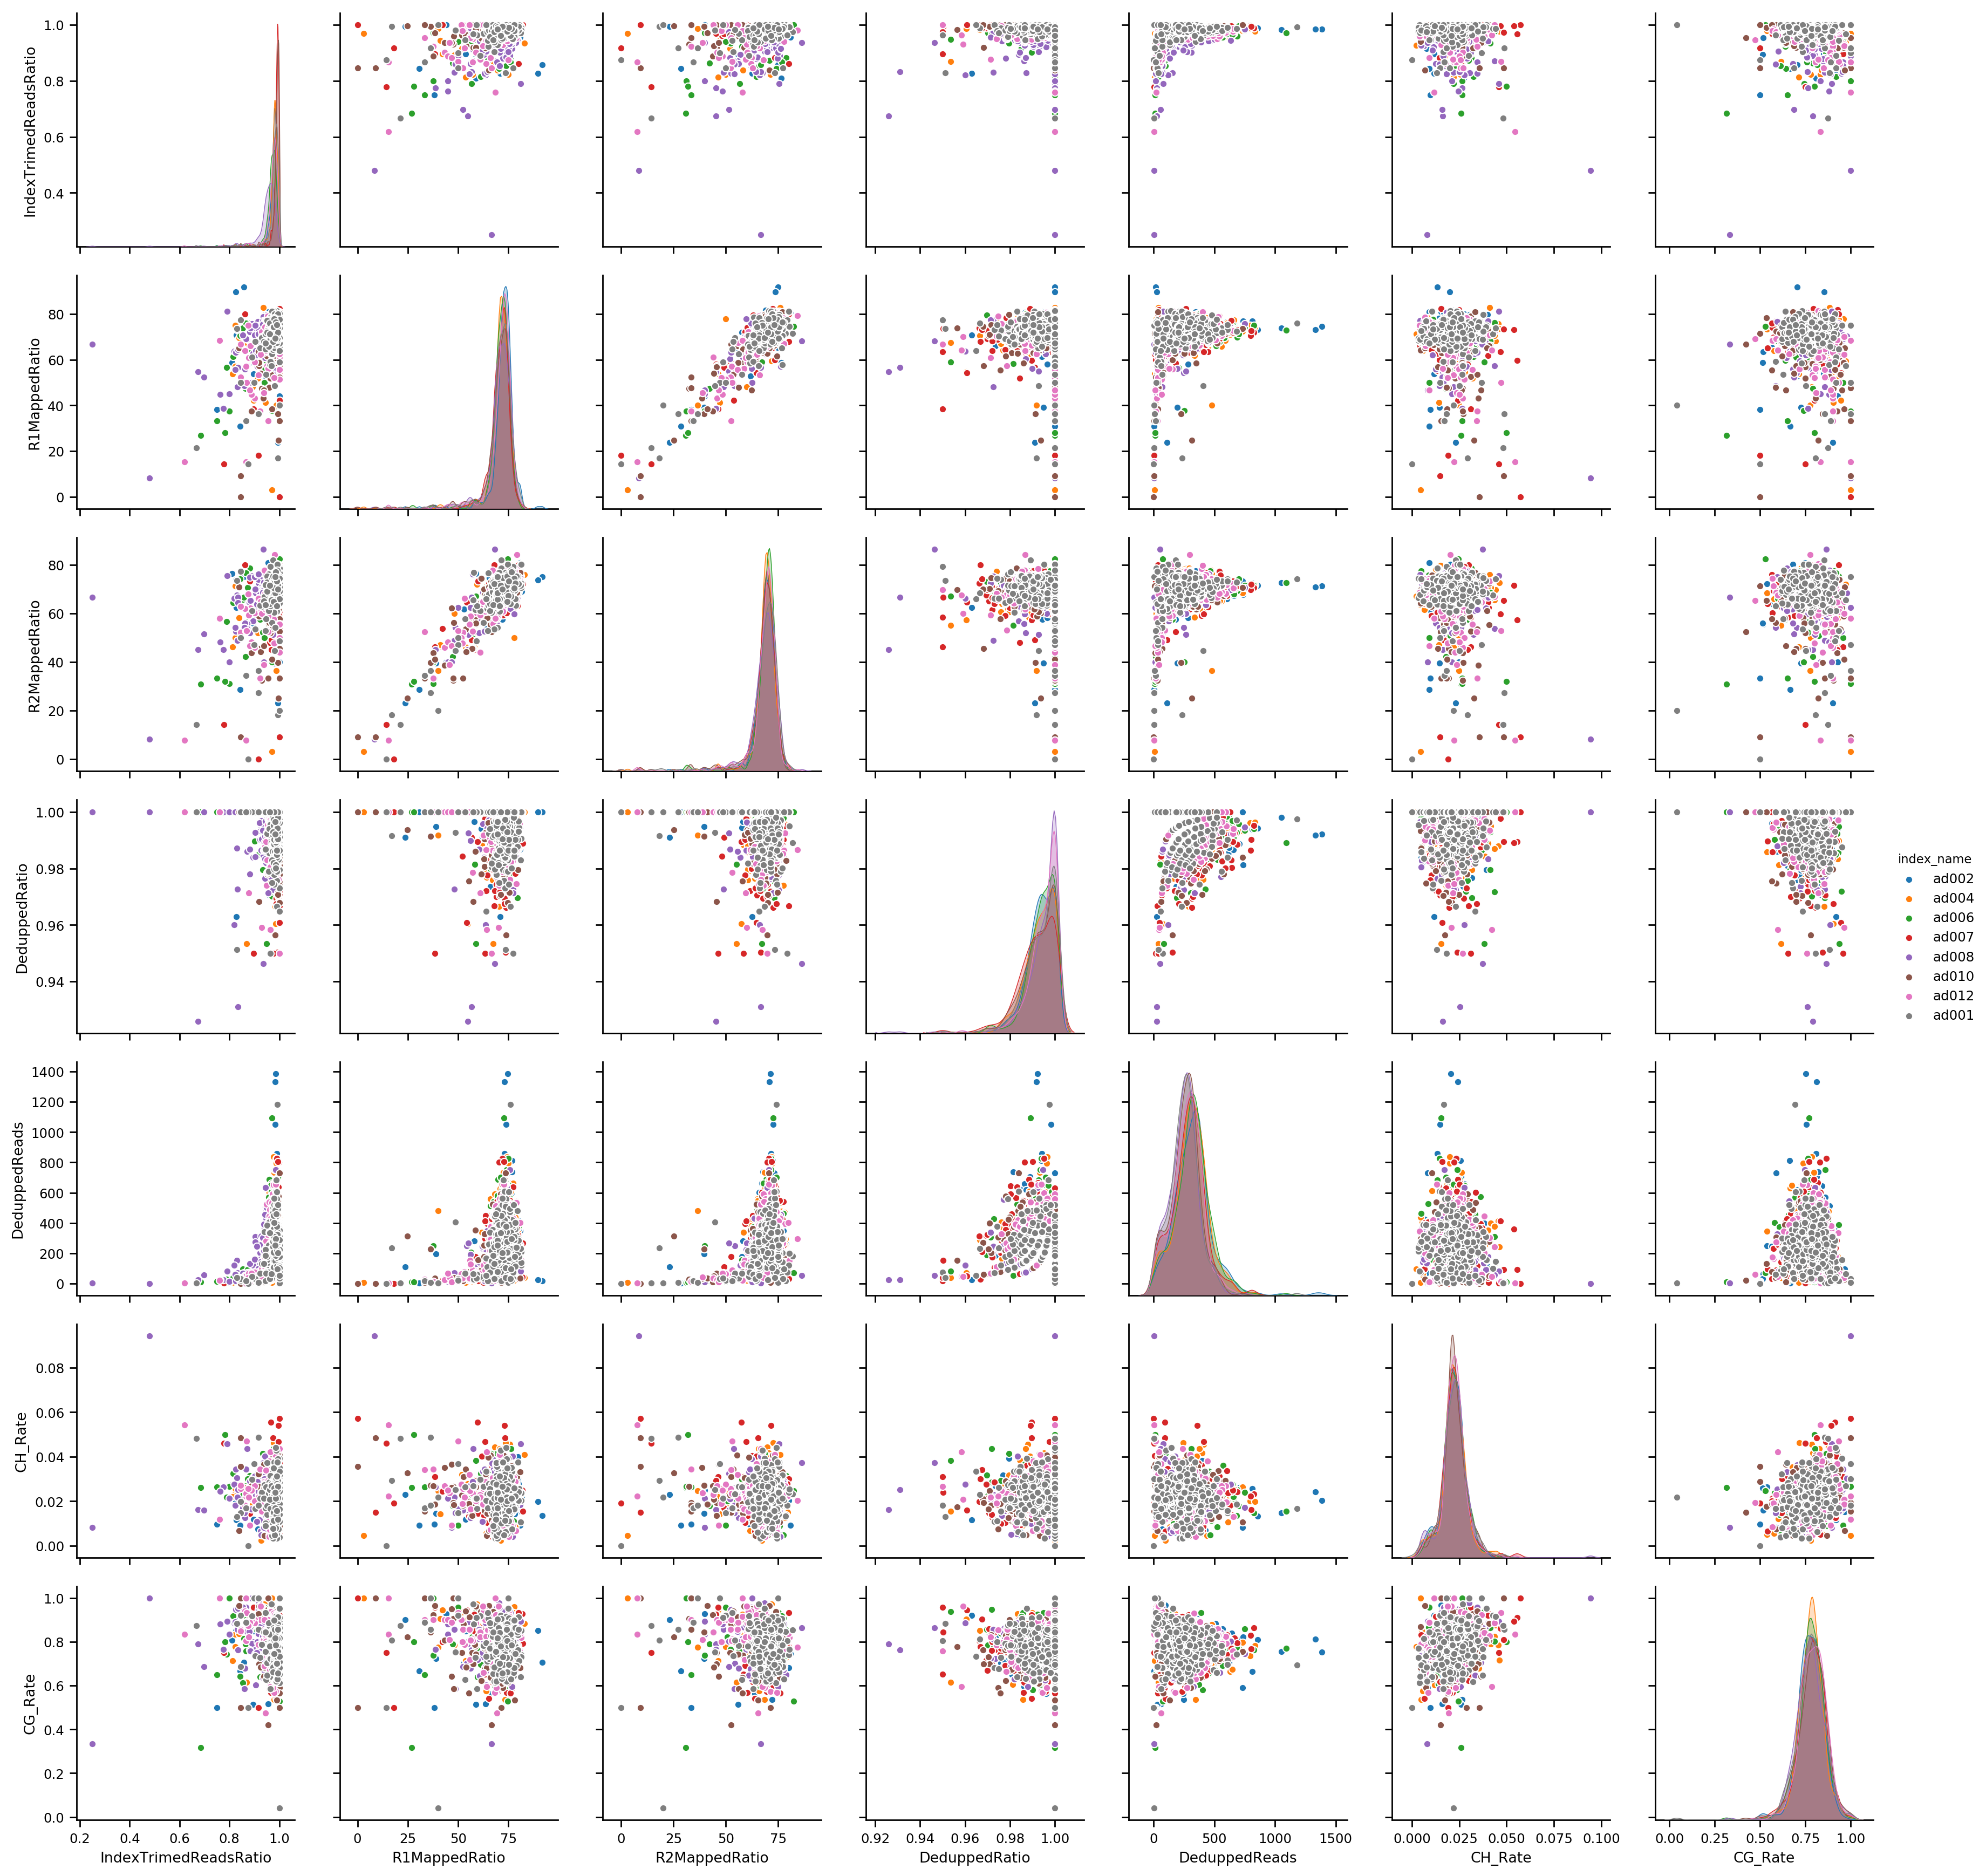

In [25]:
sns.pairplot(total_meta.reset_index()[['index_name', 'IndexTrimedReadsRatio',
                                       'R1MappedRatio', 'R2MappedRatio',
                                       'DeduppedRatio', 'DeduppedReads', 'CH_Rate', 'CG_Rate']], 
             hue='index_name')

/gale/netapp/home/hanliu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


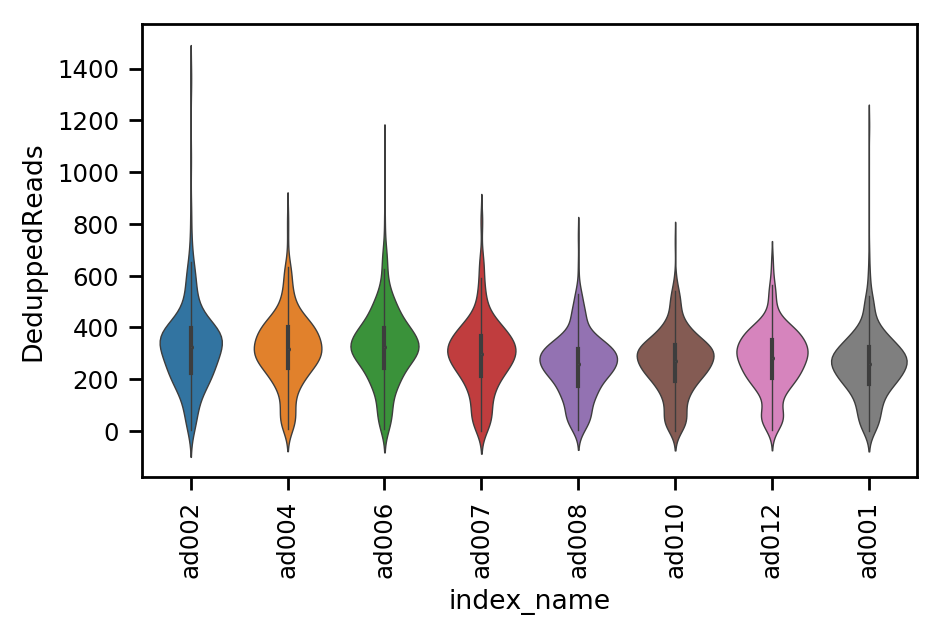

In [26]:
fig, ax = simple_violin(x='index_name', y='DeduppedReads', 
                        data=total_meta.reset_index())